In [1]:
import matplotlib.pyplot as plt
plt.switch_backend('tkagg')
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
import matplotlib
%matplotlib inline

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata/ieee37_newload.dss'
dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata/ieee37.dss'

load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/breakpoints.csv'

import numpy as np
from pycigar.controllers.base_controller import BaseController


class AdaptiveAutoFixedController(BaseController):
    """Fixed controller is the controller that do nothing.

    It only returns the 'default_control_setting' value when being called.

    Attributes
    ----------
    additional_params : dict
        The parameters of the controller
    """

    def __init__(self, device_id, additional_params):
        """Instantiate an fixed Controller."""
        BaseController.__init__(self, device_id)
        self.additional_params = additional_params
        self.trigger = False
        self.hack_curve = [-0.001, 0.000, 0.000, 0.001, 0.002]
        self.average_span = 10

        self.action = None

    def get_action(self, env):
        """See parent class."""
        # nothing to do here, the setting in the device is as default
        index = env.k.device.vectorized_pv_inverter_device.list_device.index(self.device_id)
        if env.k.device.vectorized_pv_inverter_device.y[index] < 0.02:
            self.trigger = False

        if self.trigger is False:
            node_id = env.k.device.devices[self.device_id]['node_id']
            if env.k.time - self.average_span - 1 > 0:
                vk = np.mean(env.k.node.nodes[node_id]['voltage'][env.k.time - self.average_span - 1 : env.k.time - 1])
            else:
                vk = np.mean(env.k.node.nodes[node_id]['voltage'][0 : env.k.time - 1])
            self.action = vk + self.hack_curve
            self.trigger = True
            return self.action
        else:
            return self.action

    def reset(self):
        """See parent class."""
        self.trigger = False

from pycigar.utils.registry import register_devcon
register_devcon('adaptive_auto_fixed_controller', AdaptiveAutoFixedController)
start = 100
hack=0.4
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_auto_fixed_controller'

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step([10, 10, 10])

yay


In [3]:
from pycigar.utils.logging import logger

In [4]:
Logger = logger()

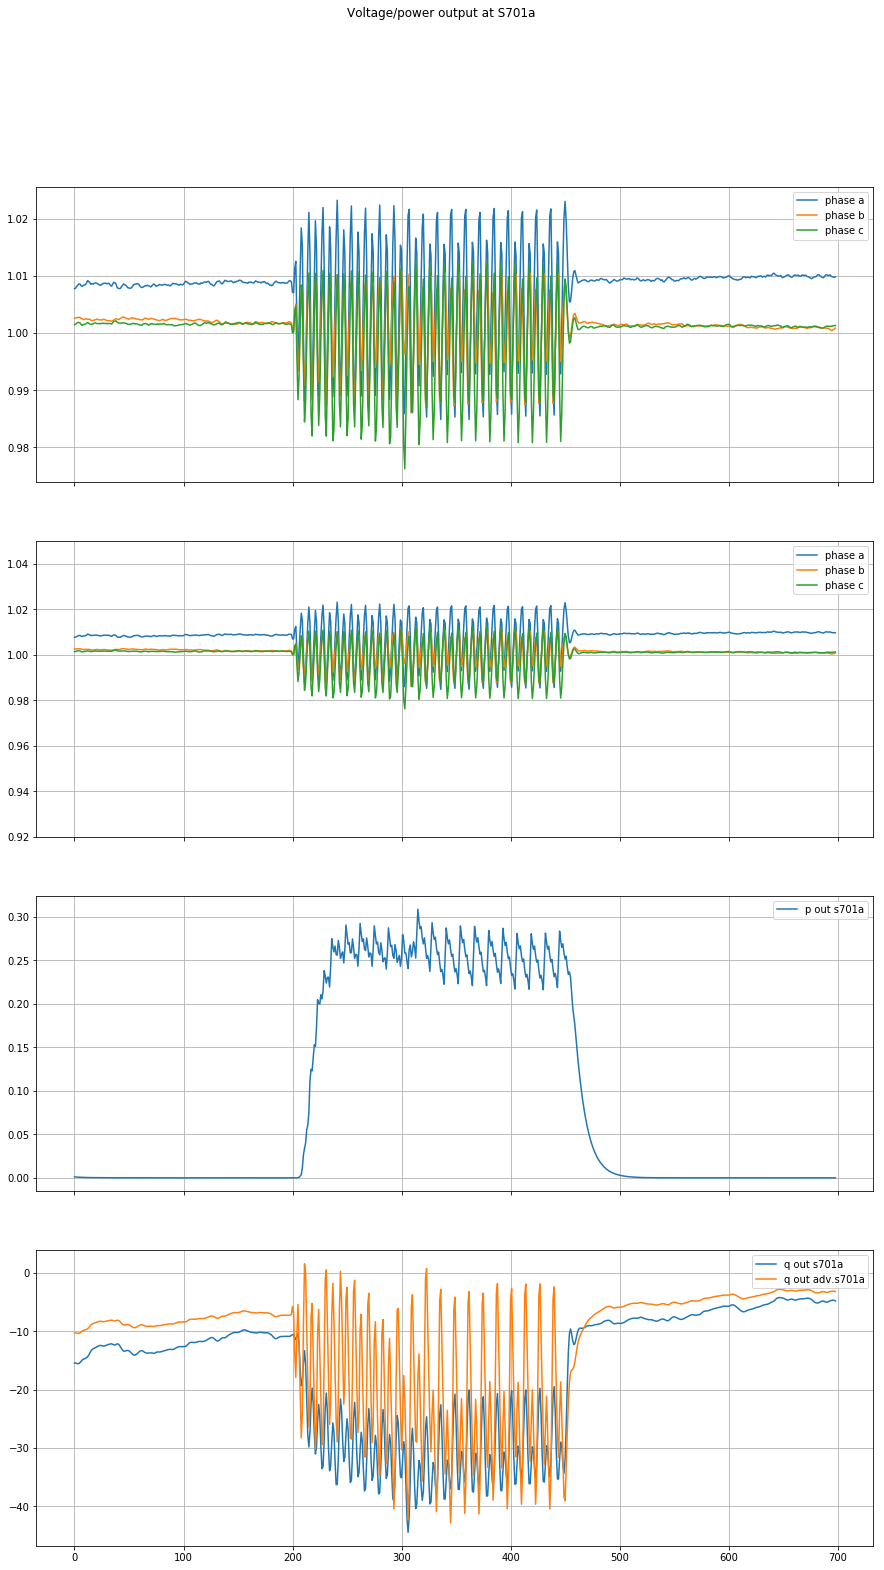

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 25))
fig.suptitle('Voltage/power output at S701a')
ax1.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax1.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax1.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax2.plot()
ax2.set_ylim(0.92, 1.05)
ax2.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax2.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax2.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax3.plot(Logger.log_dict['inverter_s701a']['y'], label='p out s701a')
#ax3.plot(Logger.log_dict['adversary_inverter_s701a']['p_out'], label='p out adv.s701a')

ax4.plot(Logger.log_dict['inverter_s701a']['q_out'], label='q out s701a')
ax4.plot(Logger.log_dict['adversary_inverter_s701a']['q_out'], label='q out adv.s701a')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

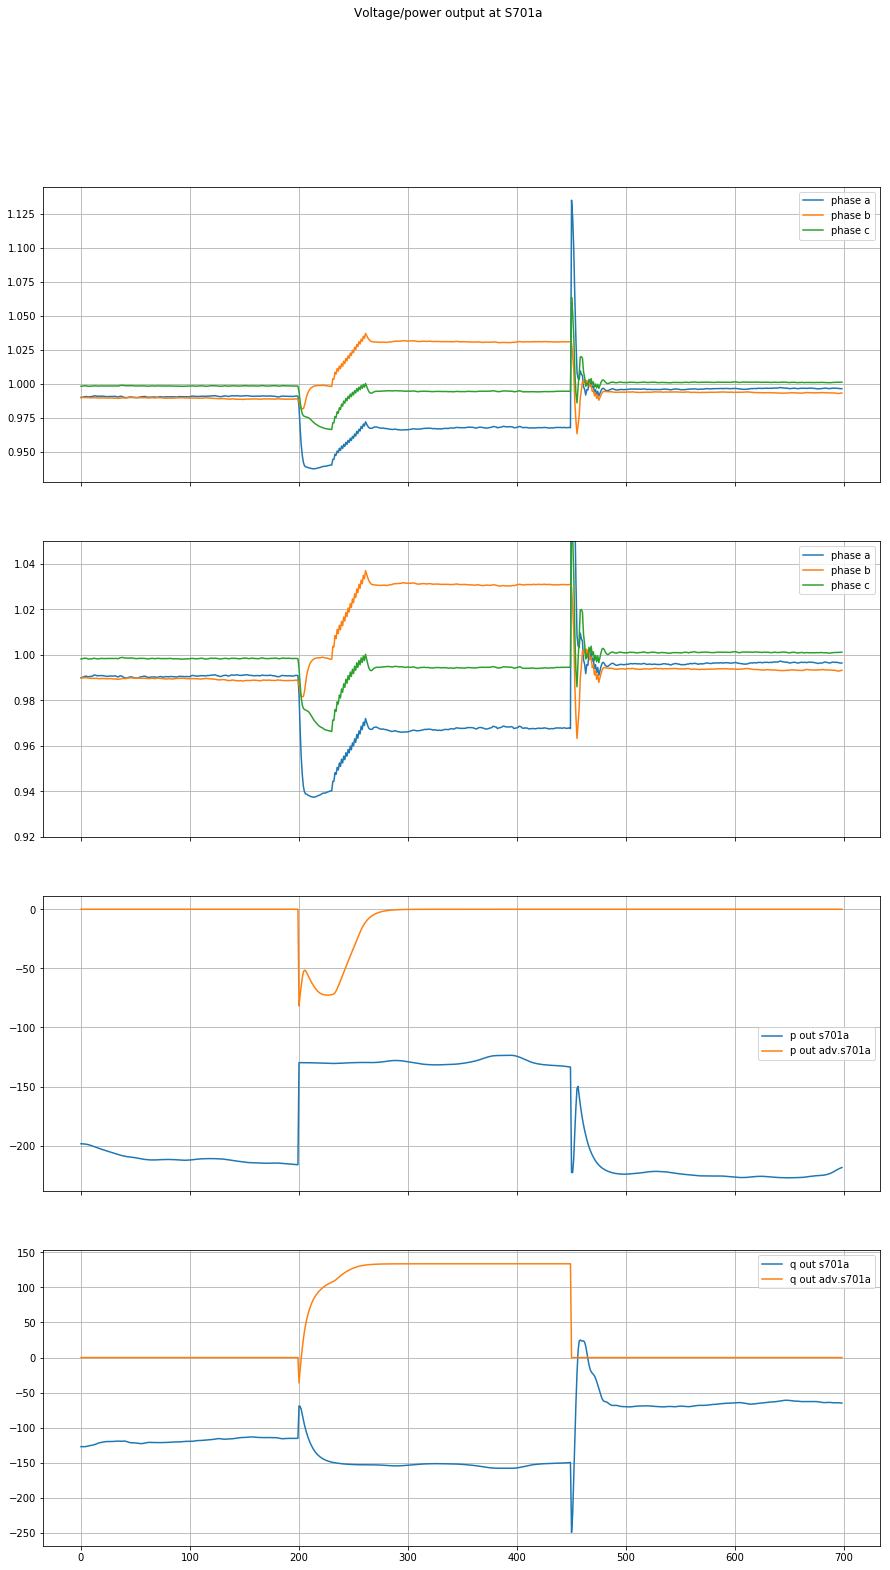

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 25))
fig.suptitle('Voltage/power output at S701a')
ax1.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax1.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax1.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax2.plot()
ax2.set_ylim(0.92, 1.05)
ax2.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax2.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax2.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax3.plot(Logger.log_dict['inverter_s701a']['p_out'], label='p out s701a')
ax3.plot(Logger.log_dict['adversary_inverter_s701a']['p_out'], label='p out adv.s701a')

ax4.plot(Logger.log_dict['inverter_s701a']['q_out'], label='q out s701a')
ax4.plot(Logger.log_dict['adversary_inverter_s701a']['q_out'], label='q out adv.s701a')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

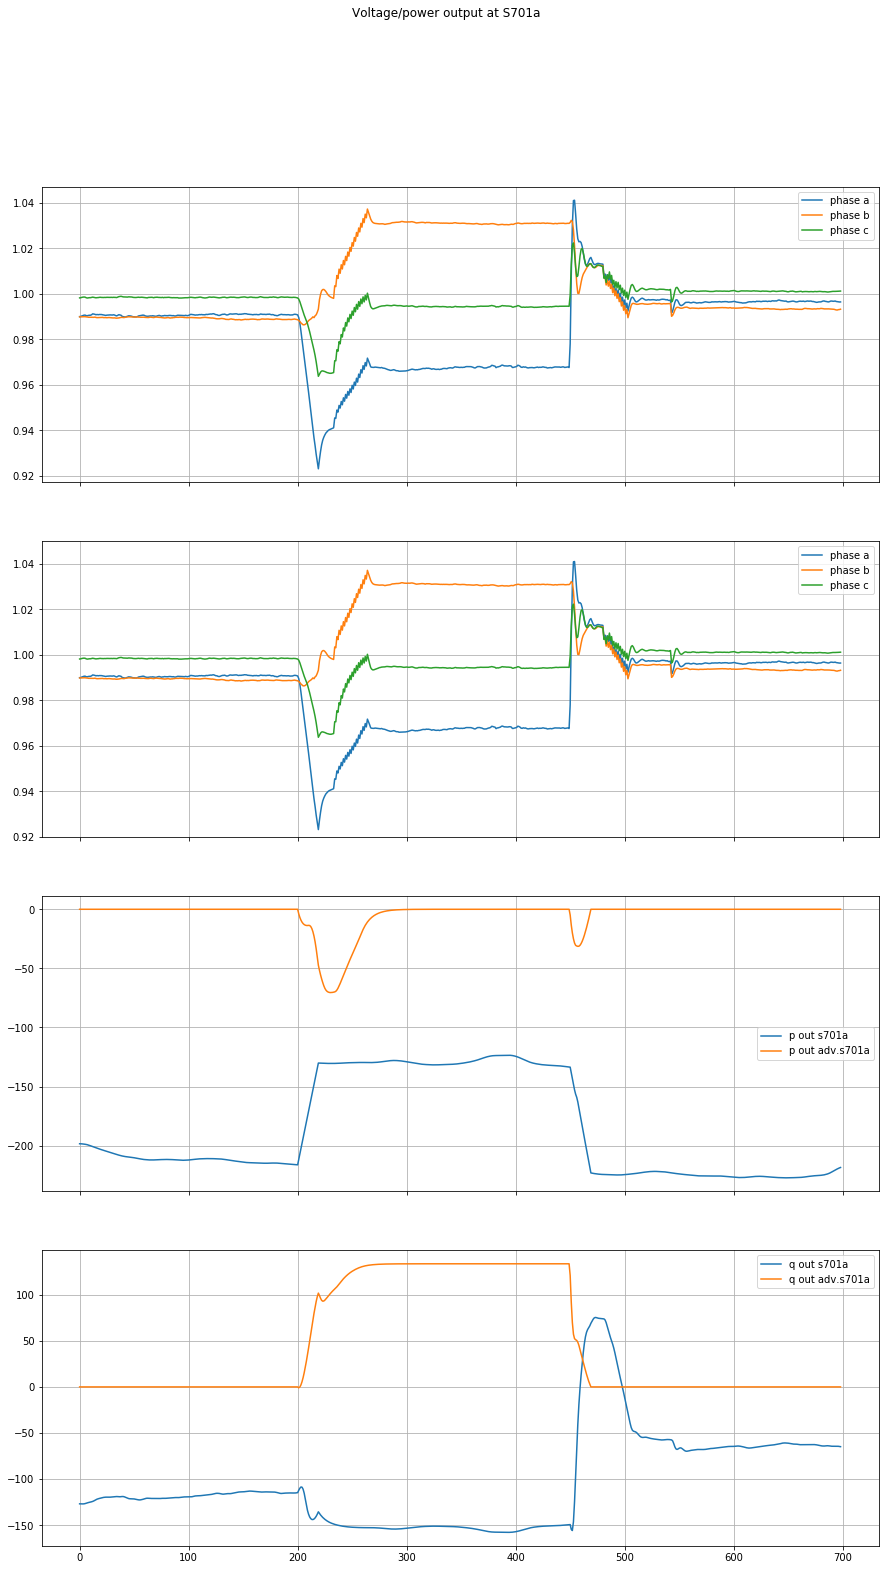

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 25))
fig.suptitle('Voltage/power output at S701a')
ax1.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax1.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax1.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax2.plot()
ax2.set_ylim(0.92, 1.05)
ax2.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax2.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax2.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax3.plot(Logger.log_dict['inverter_s701a']['p_out'], label='p out s701a')
ax3.plot(Logger.log_dict['adversary_inverter_s701a']['p_out'], label='p out adv.s701a')

ax4.plot(Logger.log_dict['inverter_s701a']['q_out'], label='q out s701a')
ax4.plot(Logger.log_dict['adversary_inverter_s701a']['q_out'], label='q out adv.s701a')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

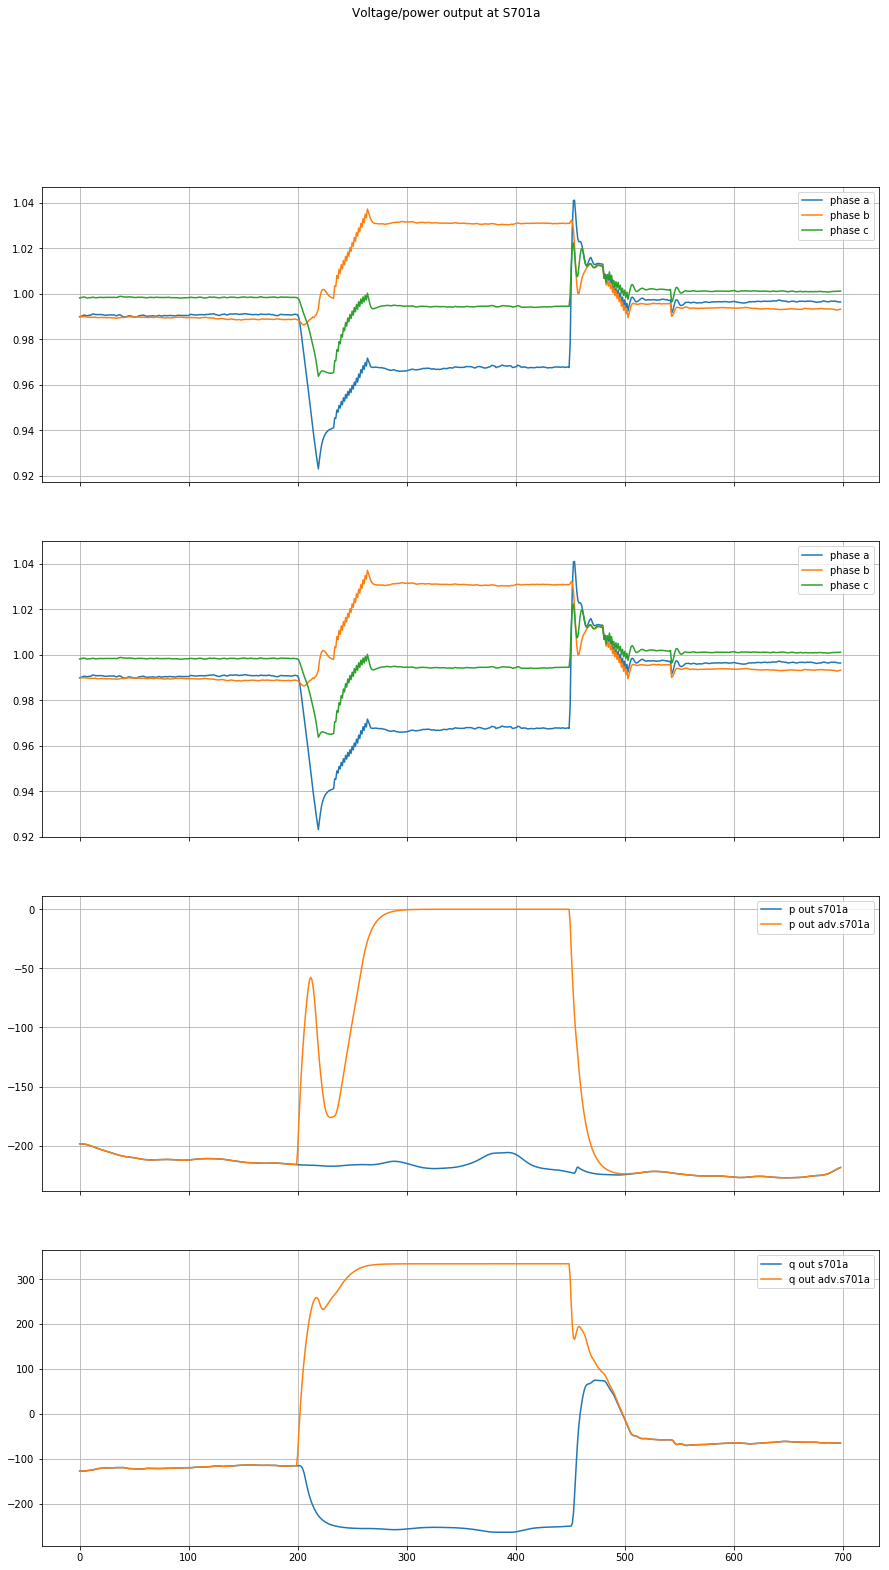

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 25))
fig.suptitle('Voltage/power output at S701a')
ax1.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax1.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax1.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax2.plot()
ax2.set_ylim(0.92, 1.05)
ax2.plot(Logger.log_dict['s701a']['voltage'], label='phase a')
ax2.plot(Logger.log_dict['s701b']['voltage'], label='phase b')
ax2.plot(Logger.log_dict['s701c']['voltage'], label='phase c')

ax3.plot(Logger.log_dict['inverter_s701a']['p_out'], label='p out s701a')
ax3.plot(Logger.log_dict['adversary_inverter_s701a']['p_out'], label='p out adv.s701a')

ax4.plot(Logger.log_dict['inverter_s701a']['q_out'], label='q out s701a')
ax4.plot(Logger.log_dict['adversary_inverter_s701a']['q_out'], label='q out adv.s701a')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

In [7]:
import json
import pandas as pd
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray) or isinstance(obj, pd.Series):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

with open('/home/toanngo/new_load.json', 'w') as fp:
    json.dump(Logger.log_dict, fp, cls=NpEncoder)

In [6]:
Logger.log_dict.keys()

dict_keys(['u_metrics', 'v_metrics', 'v_worst_metrics', 'y_metrics', 'component_observation', 'current', 'inverter_s701a', 'adversary_inverter_s701a', 'inverter_s701b', 'adversary_inverter_s701b', 'inverter_s701c', 'adversary_inverter_s701c', 'inverter_s712c', 'adversary_inverter_s712c', 'inverter_s713c', 'adversary_inverter_s713c', 'inverter_s714a', 'adversary_inverter_s714a', 'inverter_s714b', 'adversary_inverter_s714b', 'inverter_s718a', 'adversary_inverter_s718a', 'inverter_s720c', 'adversary_inverter_s720c', 'inverter_s722b', 'adversary_inverter_s722b', 'inverter_s722c', 'adversary_inverter_s722c', 'inverter_s724b', 'adversary_inverter_s724b', 'inverter_s725b', 'adversary_inverter_s725b', 'inverter_s727c', 'adversary_inverter_s727c', 'inverter_s728', 'adversary_inverter_s728', 'inverter_s729a', 'adversary_inverter_s729a', 'inverter_s730c', 'adversary_inverter_s730c', 'inverter_s731b', 'adversary_inverter_s731b', 'inverter_s732c', 'adversary_inverter_s732c', 'inverter_s733a', 'adve

IEEE123

In [1]:
from pycigar.utils.input_parser import input_parser
import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('tkagg')
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
import random 

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/ieee123.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/breakpoints.csv'

start = 11000

sim_params = input_parser(misc_inputs, dss, load_solar, 
                          breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=0.3)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['env_config']['sim_per_step'] = 30
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'oscillation_fixed_controller'

sim_params['M'] = 150
sim_params['N'] = 2
sim_params['P'] = 1
sim_params['Q'] = 1
sim_params['T'] = 150

sim_params['cluster'] = {'1': ['s52a', 's53a', 's55a', 's56b', 's58b', 's59b', 's1a', 's2b', 's4c', 's5c', 's6c', 's7a', 's9a', 's10a', 's11a', 's12b', 's16c', 's17c', 's34c', 's19a', 's20a', 's22b', 's24c', 's28a', 's29a', 's30c', 's31c', 's32c', 's33a', 's35a', 's37a', 's38b', 's39b', 's41c', 's42a', 's43b', 's45a', 's46a', 's47', 's48', 's49a', 's49b', 's49c', 's50c', 's51a'],
                             '2': ['s86b', 's87b', 's88a', 's90b', 's92c', 's94a', 's95b', 's96b', 's102c', 's103c', 's104c', 's106b', 's107b', 's109a', 's111a', 's112a', 's113a', 's114a', 's60a', 's62c', 's63a', 's64b', 's65a', 's65b', 's65c', 's66c', 's68a', 's69a', 's70a', 's71a', 's73c', 's74c', 's75c', 's76a', 's76b', 's76c', 's77b', 's79a', 's80b', 's82a', 's83c', 's84c', 's85c', 's98a', 's99b', 's100c']}



from pycigar.envs.multiagent.multi_envs import ClusterMultiEnv
env = ClusterMultiEnv(sim_params=sim_params)
env.reset()
done = False
t = 0
while not done:
    t += 1
    if t < 10:
        _, r, done, _ = env.step({'1': [10, 10, 10], '2': [10, 10, 10]})
    else:
        _, r, done, _ = env.step({'1': [15, 12, 14], '2': [15, 15, 15]})
    done = done['__all__']


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from pycigar.utils.logging import logger
from pycigar.utils.output import plot_cluster

In [3]:
def plot_cluster(log_dict, custom_metrics, epoch='', unbalance=False, multiagent=False):
    def get_translation_and_slope(a_val, init_a):
        points = np.array(a_val)
        slope = points[:, 1] - points[:, 0]
        translation = points[:, 2] - init_a[2]
        return translation, slope

    plt.rc('font', size=15)
    plt.rc('figure', titlesize=35)

    cluster = {1: ['s1a', 's2b', 's4c', 's5c', 's6c', 's7a', 's9a', 's10a', 's11a', 's12b', 's16c', 's17c', 's34c'],
               2: ['s52a', 's53a', 's55a', 's56b', 's58b', 's59b', 's86b', 's87b', 's88a', 's90b', 's92c', 's94a', 's95b', 's96b'],
               3: ['s19a', 's20a', 's22b', 's24c', 's28a', 's29a', 's30c', 's31c', 's32c', 's33a', 's35a', 's37a', 's38b', 's39b', 's41c', 's42a', 's43b', 's45a', 's46a', 's47', 's48', 's49a', 's49b', 's49c', 's50c', 's51a'],
               4: ['s102c', 's103c', 's104c', 's106b', 's107b', 's109a', 's111a', 's112a', 's113a', 's114a'],
               5: ['s60a', 's62c', 's63a', 's64b', 's65a', 's65b', 's65c', 's66c', 's68a', 's69a', 's70a', 's71a', 's73c', 's74c', 's75c', 's76a', 's76b', 's76c', 's77b', 's79a', 's80b', 's82a', 's83c', 's84c', 's85c', 's98a', 's99b', 's100c']}

    f, ax = plt.subplots(5, 5, figsize=(30, 15))
    # title = '[epoch {}][time {}][hack {}] reward: a_1: {:.2f}, a_2: {:.2f}, a_3: {:.2f}, a_4: {:.2f}, a_5: {:.2f}'.format(
    #         epoch, custom_metrics['start_time'], custom_metrics['hack'],
    #         sum(log_dict['1']['reward']), sum(log_dict['2']['reward']),
    #         sum(log_dict['3']['reward']), sum(log_dict['4']['reward']),
    #         sum(log_dict['5']['reward'])
    #     )
    title = '[epoch {}][time {}][hack {}]'.format(
            epoch, custom_metrics['start_time'], custom_metrics['hack']
        )
    f.suptitle(title)

    voltage = np.array(log_dict['inverter_s1a']['v'])
    ax[0, 0].plot(voltage[:, 0], label='voltage_a')
    ax[0, 0].plot(voltage[:, 1], label='voltage_b')
    ax[0, 0].plot(voltage[:, 2], label='voltage_c')
    ax[1, 0].plot(np.array(log_dict['inverter_s1a']['u'])*100, label='unbalance')
    ax[1, 0].plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='unbalance_worst')
    ax[2, 0].plot(np.array(log_dict['y_metrics']['y_worst']), label='oscillation_worst')
    ax[2, 0].plot(log_dict['inverter_s1a']['y'], label='oscillation')
    translation, slope = get_translation_and_slope(log_dict['inverter_s1a']['control_setting'], custom_metrics['init_control_settings']['inverter_s1a'])
    ax[3, 0].plot(translation, color='tab:blue', label='act_phase_a')
    translation, slope = get_translation_and_slope(log_dict['inverter_s2b']['control_setting'], custom_metrics['init_control_settings']['inverter_s2b'])
    ax[3, 0].plot(translation, color='tab:orange', label='act_phase_b')
    translation, slope = get_translation_and_slope(log_dict['inverter_s4c']['control_setting'], custom_metrics['init_control_settings']['inverter_s4c'])
    ax[3, 0].plot(translation, color='tab:green', label='act_phase_c')
    ax[0, 0].set_ylim([0.93, 1.07])
    ax[1, 0].set_ylim([0, 6.5])
    ax[1, 0].axhline(3, linestyle='--', color='orange')
    ax[1, 0].axhline(6, linestyle='--', color='red')
    ax[2, 0].set_ylim([0, 0.5])
    ax[3, 0].set_ylim([-0.1, 0.1])

    voltage = np.array(log_dict['inverter_s52a']['v'])
    ax[0, 1].plot(voltage[:, 0], label='voltage_a')
    ax[0, 1].plot(voltage[:, 1], label='voltage_b')
    ax[0, 1].plot(voltage[:, 2], label='voltage_c')
    ax[1, 1].plot(np.array(log_dict['inverter_s52a']['u'])*100, label='unbalance')
    ax[1, 1].plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='unbalance_worst')
    ax[2, 1].plot(np.array(log_dict['y_metrics']['y_worst']), label='oscillation_worst')
    ax[2, 1].plot(log_dict['inverter_s52a']['y'], label='oscillation')
    translation, slope = get_translation_and_slope(log_dict['inverter_s52a']['control_setting'], custom_metrics['init_control_settings']['inverter_s52a'])
    ax[3, 1].plot(translation, color='tab:blue', label='act_phase_a')
    translation, slope = get_translation_and_slope(log_dict['inverter_s56b']['control_setting'], custom_metrics['init_control_settings']['inverter_s56b'])
    ax[3, 1].plot(translation, color='tab:orange', label='act_phase_b')
    translation, slope = get_translation_and_slope(log_dict['inverter_s92c']['control_setting'], custom_metrics['init_control_settings']['inverter_s92c'])
    ax[3, 1].plot(translation, color='tab:green', label='act_phase_c')
    ax[0, 1].set_ylim([0.93, 1.07])
    ax[1, 1].set_ylim([0, 6.5])
    ax[1, 1].axhline(3, linestyle='--', color='orange')
    ax[1, 1].axhline(6, linestyle='--', color='red')
    ax[2, 1].set_ylim([0, 0.5])
    ax[3, 1].set_ylim([-0.1, 0.1])

    voltage = np.array(log_dict['inverter_s28a']['v'])
    ax[0, 2].plot(voltage[:, 0], label='voltage_a')
    ax[0, 2].plot(voltage[:, 1], label='voltage_b')
    ax[0, 2].plot(voltage[:, 2], label='voltage_c')
    ax[1, 2].plot(np.array(log_dict['inverter_s28a']['u'])*100, label='unbalance')
    ax[1, 2].plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='unbalance_worst')
    ax[2, 2].plot(np.array(log_dict['y_metrics']['y_worst']), label='oscillation_worst')
    ax[2, 2].plot(log_dict['inverter_s28a']['y'], label='oscillation')
    translation, slope = get_translation_and_slope(log_dict['inverter_s19a']['control_setting'], custom_metrics['init_control_settings']['inverter_s19a'])
    ax[3, 2].plot(translation, color='tab:blue', label='act_phase_a')
    translation, slope = get_translation_and_slope(log_dict['inverter_s22b']['control_setting'], custom_metrics['init_control_settings']['inverter_s22b'])
    ax[3, 2].plot(translation, color='tab:orange', label='act_phase_b')
    translation, slope = get_translation_and_slope(log_dict['inverter_s24c']['control_setting'], custom_metrics['init_control_settings']['inverter_s24c'])
    ax[3, 2].plot(translation, color='tab:green', label='act_phase_c')
    ax[0, 2].set_ylim([0.93, 1.07])
    ax[1, 2].set_ylim([0, 6.5])
    ax[1, 2].axhline(3, linestyle='--', color='orange')
    ax[1, 2].axhline(6, linestyle='--', color='red')
    ax[2, 2].set_ylim([0, 0.5])
    ax[3, 2].set_ylim([-0.1, 0.1])

    voltage = np.array(log_dict['inverter_s102c']['v'])
    ax[0, 3].plot(voltage[:, 0], label='voltage_a')
    ax[0, 3].plot(voltage[:, 1], label='voltage_b')
    ax[0, 3].plot(voltage[:, 2], label='voltage_c')
    ax[1, 3].plot(np.array(log_dict['inverter_s102c']['u'])*100, label='unbalance')
    ax[1, 3].plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='unbalance_worst')
    ax[2, 3].plot(np.array(log_dict['y_metrics']['y_worst']), label='oscillation_worst')
    ax[2, 3].plot(log_dict['inverter_s102c']['y'], label='oscillation')
    translation, slope = get_translation_and_slope(log_dict['inverter_s114a']['control_setting'], custom_metrics['init_control_settings']['inverter_s114a'])
    ax[3, 3].plot(translation, color='tab:blue', label='act_phase_a')
    translation, slope = get_translation_and_slope(log_dict['inverter_s107b']['control_setting'], custom_metrics['init_control_settings']['inverter_s107b'])
    ax[3, 3].plot(translation, color='tab:orange', label='act_phase_b')
    translation, slope = get_translation_and_slope(log_dict['inverter_s104c']['control_setting'], custom_metrics['init_control_settings']['inverter_s104c'])
    ax[3, 3].plot(translation, color='tab:green', label='act_phase_c')
    ax[0, 3].set_ylim([0.93, 1.07])
    ax[1, 3].set_ylim([0, 6.5])
    ax[1, 3].axhline(3, linestyle='--', color='orange')
    ax[1, 3].axhline(6, linestyle='--', color='red')
    ax[2, 3].set_ylim([0, 0.5])
    ax[3, 3].set_ylim([-0.1, 0.1])

    voltage = np.array(log_dict['inverter_s60a']['v'])
    ax[0, 4].plot(voltage[:, 0], label='voltage_a')
    ax[0, 4].plot(voltage[:, 1], label='voltage_b')
    ax[0, 4].plot(voltage[:, 2], label='voltage_c')
    ax[1, 4].plot(np.array(log_dict['inverter_s60a']['u'])*100, label='unbalance')
    ax[1, 4].plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='unbalance_worst')
    ax[2, 4].plot(np.array(log_dict['y_metrics']['y_worst']), label='oscillation_worst')
    ax[2, 4].plot(log_dict['inverter_s60a']['y'], label='oscillation')
    translation, slope = get_translation_and_slope(log_dict['inverter_s60a']['control_setting'], custom_metrics['init_control_settings']['inverter_s60a'])
    ax[3, 4].plot(translation, color='tab:blue', label='act_phase_a')
    translation, slope = get_translation_and_slope(log_dict['inverter_s64b']['control_setting'], custom_metrics['init_control_settings']['inverter_s64b'])
    ax[3, 4].plot(translation, color='tab:orange', label='act_phase_b')
    translation, slope = get_translation_and_slope(log_dict['inverter_s62c']['control_setting'], custom_metrics['init_control_settings']['inverter_s62c'])
    ax[3, 4].plot(translation, color='tab:green', label='act_phase_c')
    ax[0, 4].set_ylim([0.93, 1.07])
    ax[1, 4].set_ylim([0, 6.5])
    ax[1, 4].axhline(3, linestyle='--', color='orange')
    ax[1, 4].axhline(6, linestyle='--', color='red')
    ax[2, 4].set_ylim([0, 0.5])
    ax[3, 4].set_ylim([-0.1, 0.1])

    reward_agents = [ra for ra in log_dict.keys() if 'reward_' in ra]
    for i, ra in enumerate(reward_agents):
        component_y = np.array(log_dict[ra]['M'])
        component_u = np.array(log_dict[ra]['T'])
        component_a = np.array(log_dict[ra]['N'])
        component_i = np.array(log_dict[ra]['P'])
        component_p = np.array(log_dict[ra]['Q'])

        ax[4, i+1].plot(-component_y, label='y')
        ax[4, i+1].plot(-component_u, label='u')
        ax[4, i+1].plot(-component_a, label='a')
        ax[4, i+1].plot(-component_i, label='i')
        ax[4, i+1].plot(-component_p, label='p')
        #ax[4, i+1].plot(-(component_y+component_u+component_a+component_i+component_p), label='abs_total')
        
    regs = [k for k in log_dict if 'reg' in k]
    for reg in regs:
        ax[4, 0].plot(log_dict[reg]['tap_number'])

    ax[4, 0].set_xlabel('time (s)')
    ax[4, 0].set_ylabel('tap number')

    for row in ax:
        for a in row:
            a.grid(b=True, which='both')
            a.legend(loc=1, ncol=1)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    return f

In [4]:
plot_cluster(logger().log_dict, logger().custom_metrics, '', '', '')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [5]:
log_dict = logger().log_dict
reward_agents = [ra for ra in log_dict.keys() if 'reward_' in ra]
for i, ra in enumerate(reward_agents):
    component_y = log_dict[ra]['M']
    component_u = log_dict[ra]['T']
    component_a = log_dict[ra]['N']
    component_i = log_dict[ra]['P']
    component_p = log_dict[ra]['Q']

In [2]:
# TEST FULL
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
from copy import deepcopy
from pycigar.envs import SimpleEnv

misc_inputs_path = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss_path = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar_path = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints_path = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

sim_params = {'misc_inputs_path': misc_inputs_path,
              'dss_path': dss_path,
              'load_solar_path': load_solar_path,
              'breakpoints_path': breakpoints_path,
              'sim_per_step': 30,
              'mode': 'fix',
              'hack_percentage': 0.3,
              'start_time': 100,
              'log': True,
              'M': 100,
              'N': 10,
              'P': 1,
              'Q': 10}

env = SimpleEnv(sim_params)
obs = env.reset()
act = {}
done = False
t = 0
while not done:
    obs, reward, done, info = env.step([10, 10, 10])


In [1]:
from pycigar.utils.logging import logger
Logger = logger()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
plt.plot(Logger.log_dict['s701a']['voltage'])
plt.plot(Logger.log_dict['s701b']['voltage'])
plt.plot(Logger.log_dict['s701c']['voltage'])

NameError: name 'plt' is not defined

In [3]:
import matplotlib.pyplot as plt
plt.switch_backend('Tkagg')
plt.plot(Logger.log_dict['v_metrics']['701'])

In [4]:
plt.show()

In [19]:
with open('/home/toanngo/old_load.json', 'r') as fp:
    data_old = json.load(fp)

with open('/home/toanngo/new_load.json', 'r') as fp:
    data_new = json.load(fp)

inverter_s701a


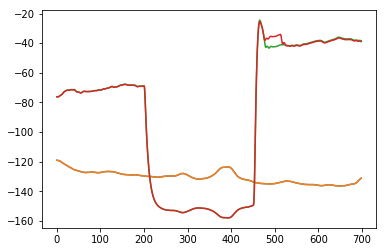

adversary_inverter_s701a


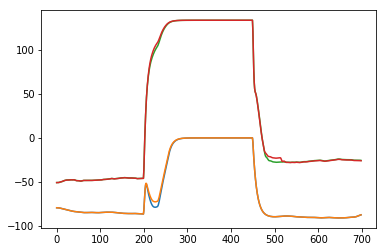

inverter_s701b


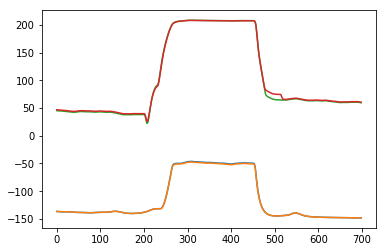

adversary_inverter_s701b


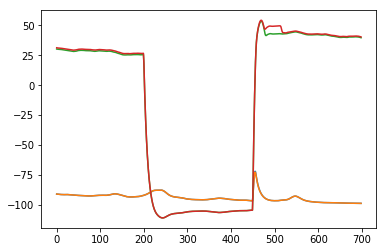

inverter_s701c


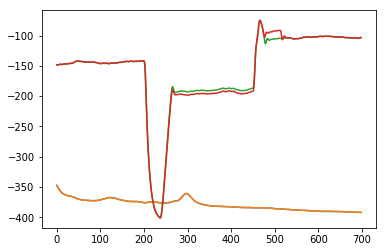

adversary_inverter_s701c


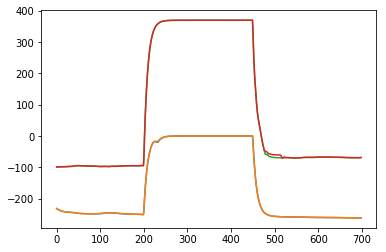

inverter_s712c


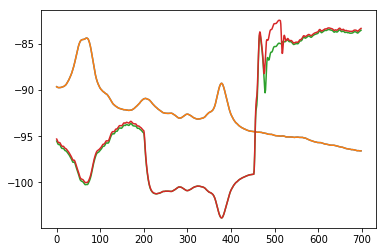

adversary_inverter_s712c


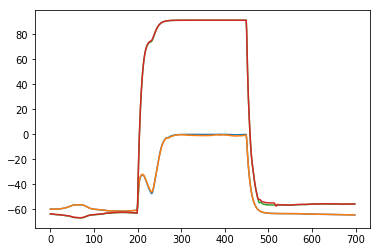

inverter_s713c


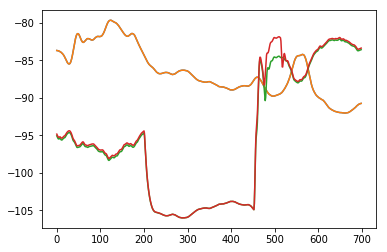

adversary_inverter_s713c


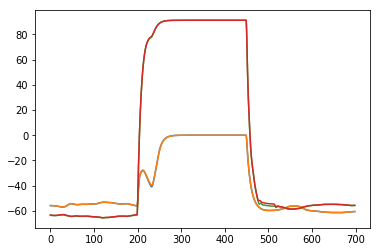

inverter_s714a


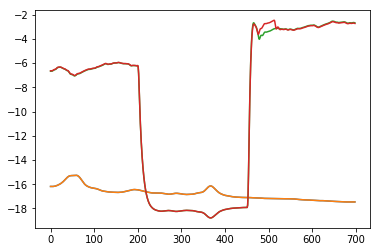

adversary_inverter_s714a


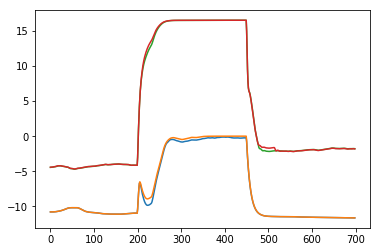

inverter_s714b


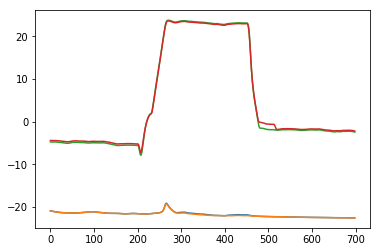

adversary_inverter_s714b


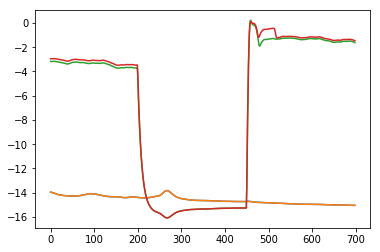

inverter_s718a


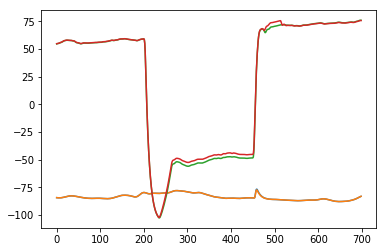

adversary_inverter_s718a


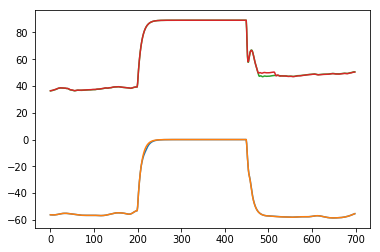

inverter_s720c


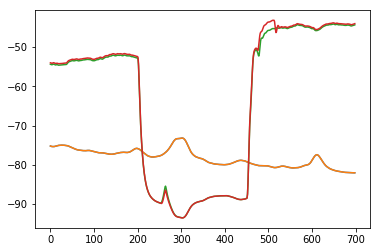

adversary_inverter_s720c


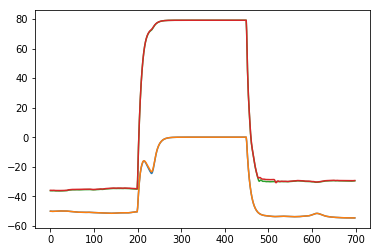

inverter_s722b


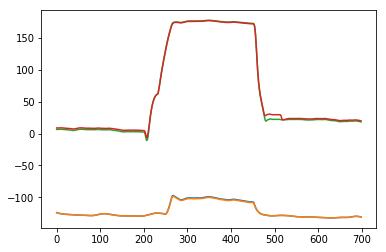

adversary_inverter_s722b


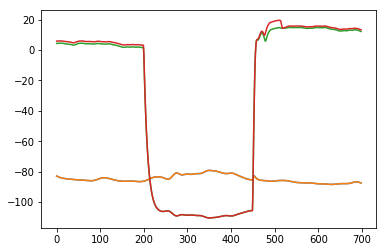

inverter_s722c


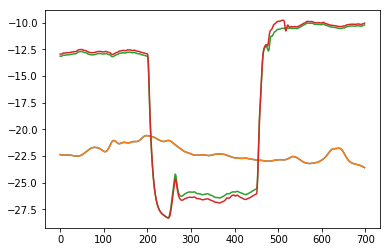

adversary_inverter_s722c


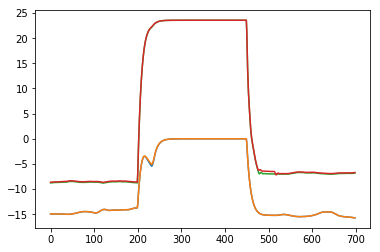

inverter_s724b


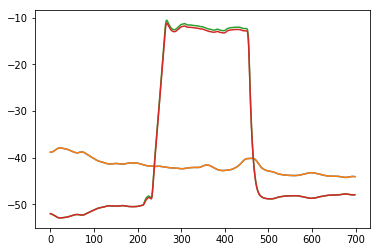

adversary_inverter_s724b


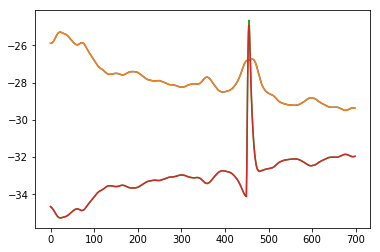

inverter_s725b


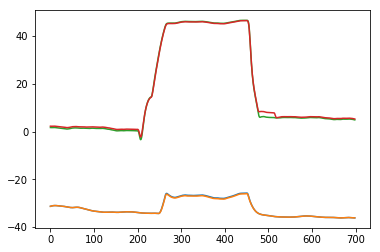

adversary_inverter_s725b


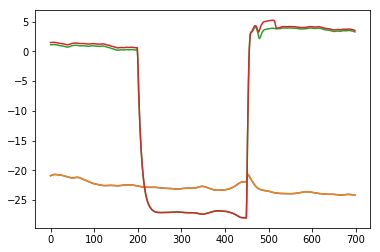

inverter_s727c


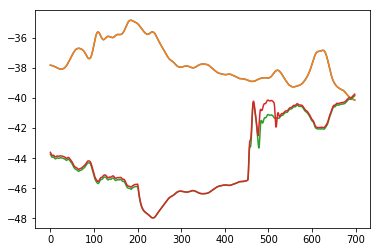

adversary_inverter_s727c


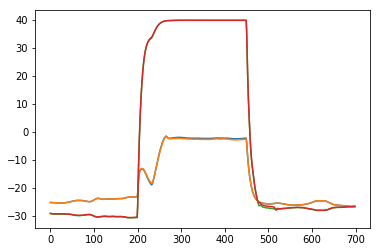

inverter_s728


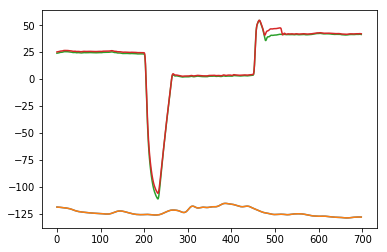

adversary_inverter_s728


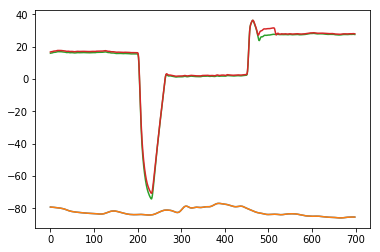

inverter_s729a


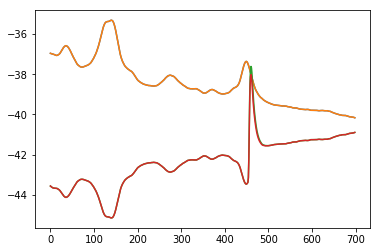

adversary_inverter_s729a


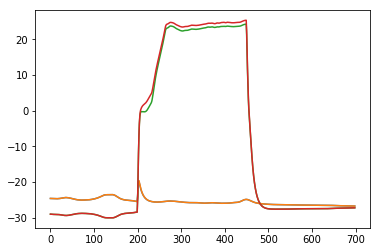

inverter_s730c


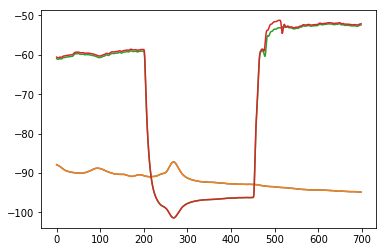

adversary_inverter_s730c


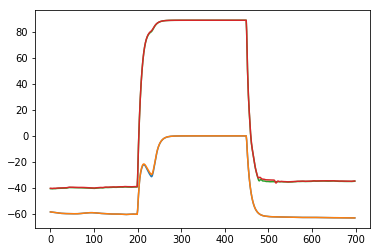

inverter_s731b


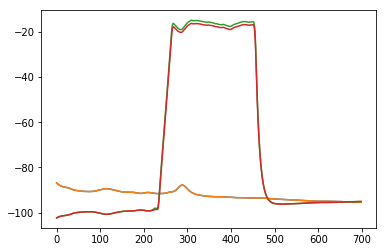

adversary_inverter_s731b


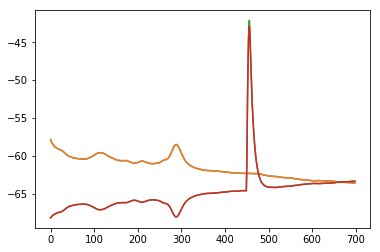

inverter_s732c


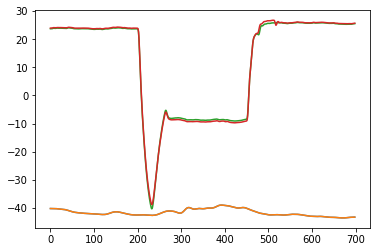

adversary_inverter_s732c


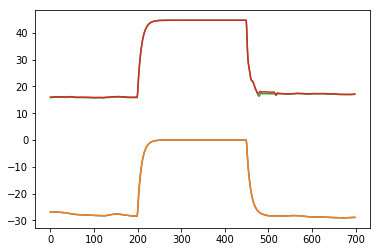

inverter_s733a


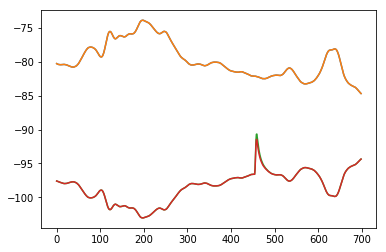

adversary_inverter_s733a


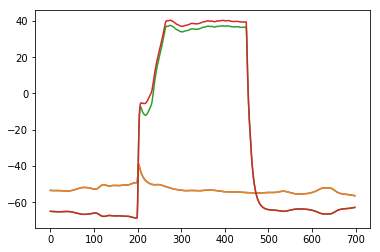

inverter_s734c


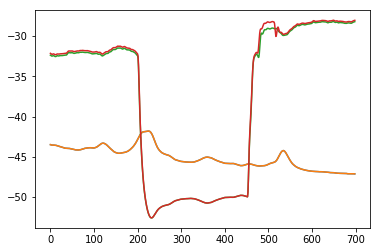

adversary_inverter_s734c


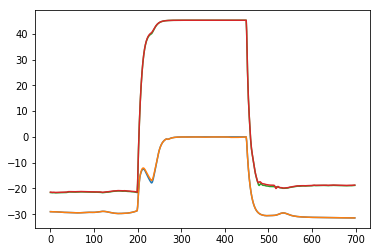

inverter_s735c


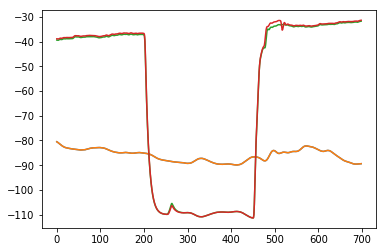

adversary_inverter_s735c


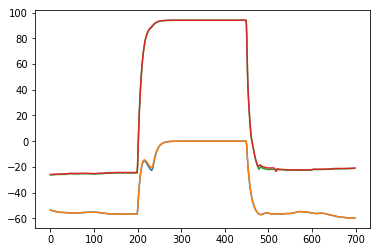

inverter_s736b


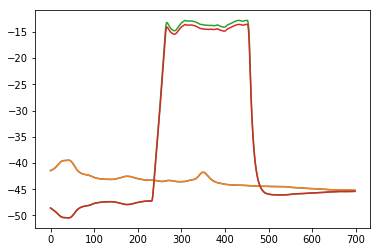

adversary_inverter_s736b


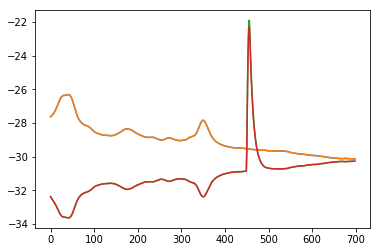

inverter_s737a


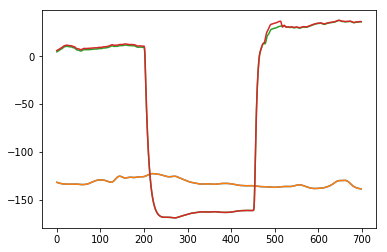

adversary_inverter_s737a


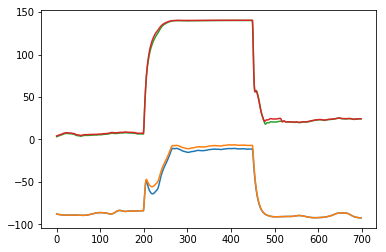

inverter_s738a


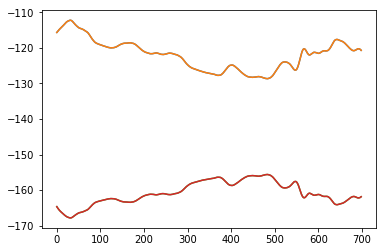

adversary_inverter_s738a


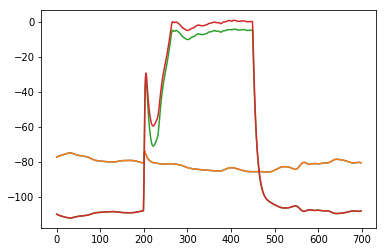

inverter_s740c


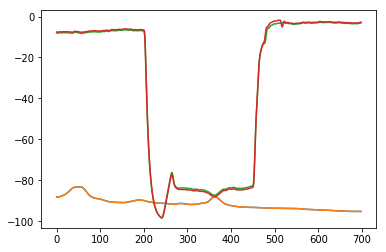

adversary_inverter_s740c


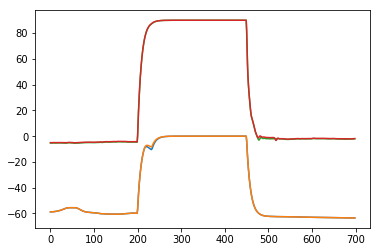

inverter_s741c


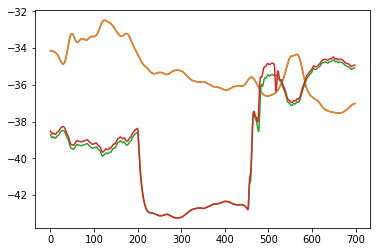

adversary_inverter_s741c


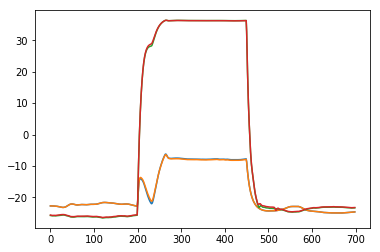

inverter_s742a


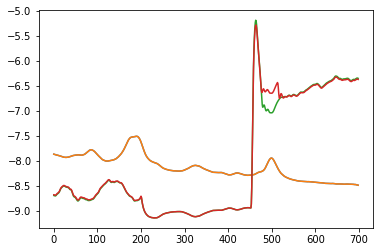

adversary_inverter_s742a


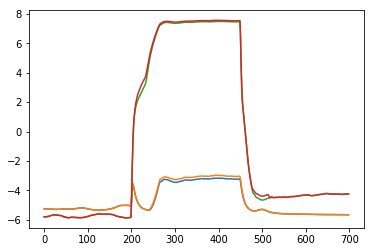

inverter_s742b


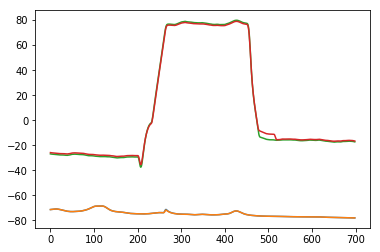

adversary_inverter_s742b


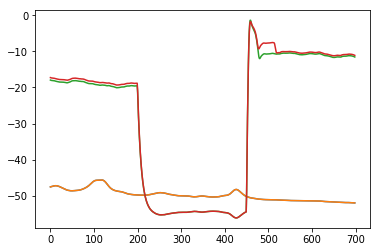

inverter_s744a


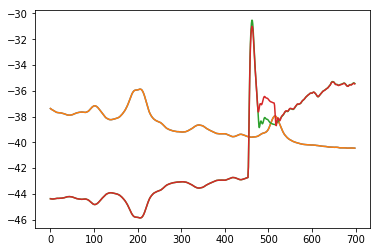

adversary_inverter_s744a


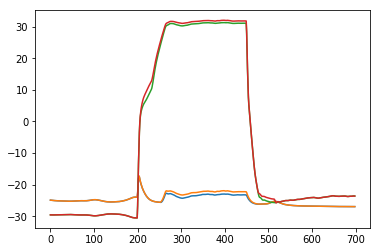

In [20]:
inverter_name = [i for i in data_old.keys() if 'inverter_' in i]
for inv in inverter_name:
    print(inv)
    plt.plot(data_old[inv]['p_out'])
    plt.plot(data_new[inv]['p_out'])
    plt.plot(data_old[inv]['q_out'])
    plt.plot(data_new[inv]['q_out'])
    plt.show()

In [18]:
np.array(data_old[inv]['p_out']) - np.array(data_new[inv]['p_out'])


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [1]:
import matplotlib.pyplot as plt
plt.switch_backend('tkagg')
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
import matplotlib
%matplotlib inline

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

start = 100
hack=0.4
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_unbalanced_fixed_controller'
policy = '/home/toanngo/ieee37_fast/main/run_train_2021-04-02_00-14-41/run_train_1814c_00000_0_2021-04-02_00-14-42/best/policy_899'

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
# env.reset()
# done = False
# while not done:
#     _, r, done, _ = env.step([10, 10, 10])

tf.compat.v1.enable_eager_execution()
policy = tf.saved_model.load(policy)
infer = policy.signatures['serving_default']
action_dist, _ = ModelCatalog.get_action_dist(Tuple([Discrete(21)] * 3), config={}, dist_type=None, framework='tf')
done = False
obs = env.reset()
obs = obs.tolist()
while not done:
    act_logits = infer(
        prev_reward=tf.constant([0.], tf.float32),
        observations=tf.constant([obs], tf.float32),
        is_training=tf.constant(False),
        seq_lens=tf.constant([0], tf.int32),
        prev_action=tf.constant([0], tf.int64)
    )['action_dist_inputs'].numpy()
    dist = action_dist(inputs=act_logits, model=None)
    act = np.array(dist.deterministic_sample()).flatten()
    obs, r, done, _ = env.step(act)
    obs = obs.tolist()

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['attack_randomization']['generator'] = 'AttackGeneratorEvaluation'
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_unbalanced_fixed_controller'
policy = '/home/toanngo/ieee37_fast/main/run_train_2021-04-02_00-14-41/run_train_1814c_00000_0_2021-04-02_00-14-42/best/policy_899'

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
# env.reset()
# done = False
# while not done:
#     _, r, done, _ = env.step([10, 10, 10])

tf.compat.v1.enable_eager_execution()
policy = tf.saved_model.load(policy)
infer = policy.signatures['serving_default']
action_dist, _ = ModelCatalog.get_action_dist(Tuple([Discrete(21)] * 3), config={}, dist_type=None, framework='tf')

for i in range(8):
    done = False
    obs = env.reset()
    obs = obs.tolist()
    while not done:
        act_logits = infer(
            prev_reward=tf.constant([0.], tf.float32),
            observations=tf.constant([obs], tf.float32),
            is_training=tf.constant(False),
            seq_lens=tf.constant([0], tf.int32),
            prev_action=tf.constant([0], tf.int64)
        )['action_dist_inputs'].numpy()
        dist = action_dist(inputs=act_logits, model=None)
        act = np.array(dist.deterministic_sample()).flatten()
        obs, r, done, _ = env.step(act)
        obs = obs.tolist()

    from pycigar.utils.output import plot_new
    from pycigar.utils.logging import logger
    plot_new(logger().log_dict, logger().custom_metrics, 0, True)
    plt.show()

KeyError: 'attack_randomization'

In [1]:
# IEEE123 multi-agent, LSTM distributed

In [1]:
from gym.spaces import Tuple, Discrete, Box
from pycigar.utils.input_parser import input_parser
import pycigar
from pycigar.utils.registry import make_create_env
from pycigar.utils.input_parser import input_parser
from pycigar.utils.logging import logger
from pycigar.utils.output import plot_new

from ray.tune.registry import register_env

import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import numpy as np
import json
from pathlib import Path
from ray.rllib.models.catalog import ModelCatalog
from tqdm import tqdm

import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style="whitegrid")
from pathlib import Path

from pycigar.utils.input_parser import input_parser
misc_inputs_path = pycigar.DATA_DIR + "/ieee123busdata/misc_inputs.csv"
dss_path = pycigar.DATA_DIR + "/ieee123busdata/ieee123.dss"
load_solar_path = pycigar.DATA_DIR + "/ieee123busdata/load_solar_data.csv"
breakpoints_path = pycigar.DATA_DIR + "/ieee123busdata/breakpoints.csv"

#best_dir_1 = Path('/home/toanngo/result (11)/ieee37_multi_agent_unb/main/run_train/run_train_1_lr=0.0001_2020-12-16_02-02-23v8n7f8l5/best/policy_1100/agent_1') # current u, step=30
#best_dir_2 = Path('/home/toanngo/result (11)/ieee37_multi_agent_unb/main/run_train/run_train_1_lr=0.0001_2020-12-16_02-02-23v8n7f8l5/best/policy_1100/agent_2')
#best_dir_3 = Path('/home/toanngo/result (11)/ieee37_multi_agent_unb/main/run_train/run_train_1_lr=0.0001_2020-12-16_02-02-23v8n7f8l5/best/policy_1100/agent_3')
best_dir = '/home/toanngo/result_123_02_04/ieee123_lstm/main/run_train_2021-04-01_17-53-02/run_train_c6f73_00002_2_N=1,P=2,Q=2,T=500,lr=5e-05_2021-04-01_17-53-05/latest/policy_899'
best_dir_1 = Path(best_dir + '/agent_1') 
best_dir_2 = Path(best_dir + '/agent_2')

start = 11000
sim_params = input_parser(misc_inputs_path, dss_path, load_solar_path, breakpoints_path, benchmark=True, vectorized_mode=True, percentage_hack=0.3)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['env_config']['sim_per_step'] = 30
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'oscillation_fixed_controller'
    
sim_params['cluster'] = {'1': ['s52a', 's53a', 's55a', 's56b', 's58b', 's59b', 's1a', 's2b', 's4c', 's5c', 's6c', 's7a', 's9a', 's10a', 's11a', 's12b', 's16c', 's17c', 's34c', 's19a', 's20a', 's22b', 's24c', 's28a', 's29a', 's30c', 's31c', 's32c', 's33a', 's35a', 's37a', 's38b', 's39b', 's41c', 's42a', 's43b', 's45a', 's46a', 's47', 's48', 's49a', 's49b', 's49c', 's50c', 's51a'],
                         '2': ['s86b', 's87b', 's88a', 's90b', 's92c', 's94a', 's95b', 's96b', 's102c', 's103c', 's104c', 's106b', 's107b', 's109a', 's111a', 's112a', 's113a', 's114a', 's60a', 's62c', 's63a', 's64b', 's65a', 's65b', 's65c', 's66c', 's68a', 's69a', 's70a', 's71a', 's73c', 's74c', 's75c', 's76a', 's76b', 's76c', 's77b', 's79a', 's80b', 's82a', 's83c', 's84c', 's85c', 's98a', 's99b', 's100c']}
            
policy = tf.saved_model.load(str(best_dir_1))
infer_1 = policy.signatures['serving_default']

policy = tf.saved_model.load(str(best_dir_2))
infer_2 = policy.signatures['serving_default']

action_dist, _ = ModelCatalog.get_action_dist(
    Tuple([Discrete(21)] * 3), config={}, dist_type=None, framework='tf')

from pycigar.envs.multiagent.multi_envs import ClusterMultiEnv

env = ClusterMultiEnv(sim_params=sim_params)
obs = env.reset()
done = False

while not done:
    new_act = {}
    for agent, ob in obs.items():        
        if agent == '1':
            infer = infer_1
        if agent == '2':
            infer = infer_2
        out = infer(
            prev_reward=tf.constant([0.], tf.float32),
            observations=tf.constant([ob], tf.float32),
            is_training=tf.constant(False),
            seq_lens=tf.constant([0], tf.int32),
            prev_action=tf.constant([0], tf.int64)
        )['action_dist_inputs'].numpy()
        dist = action_dist(inputs=out, model=None)
        #act = dist.deterministic_sample().numpy().batches
        act = np.array(dist.deterministic_sample()).flatten()
        new_act[agent] = act

    act = new_act
    last_act = new_act
    obs, r, done, _ = env.step(act)
    done = done['__all__']

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


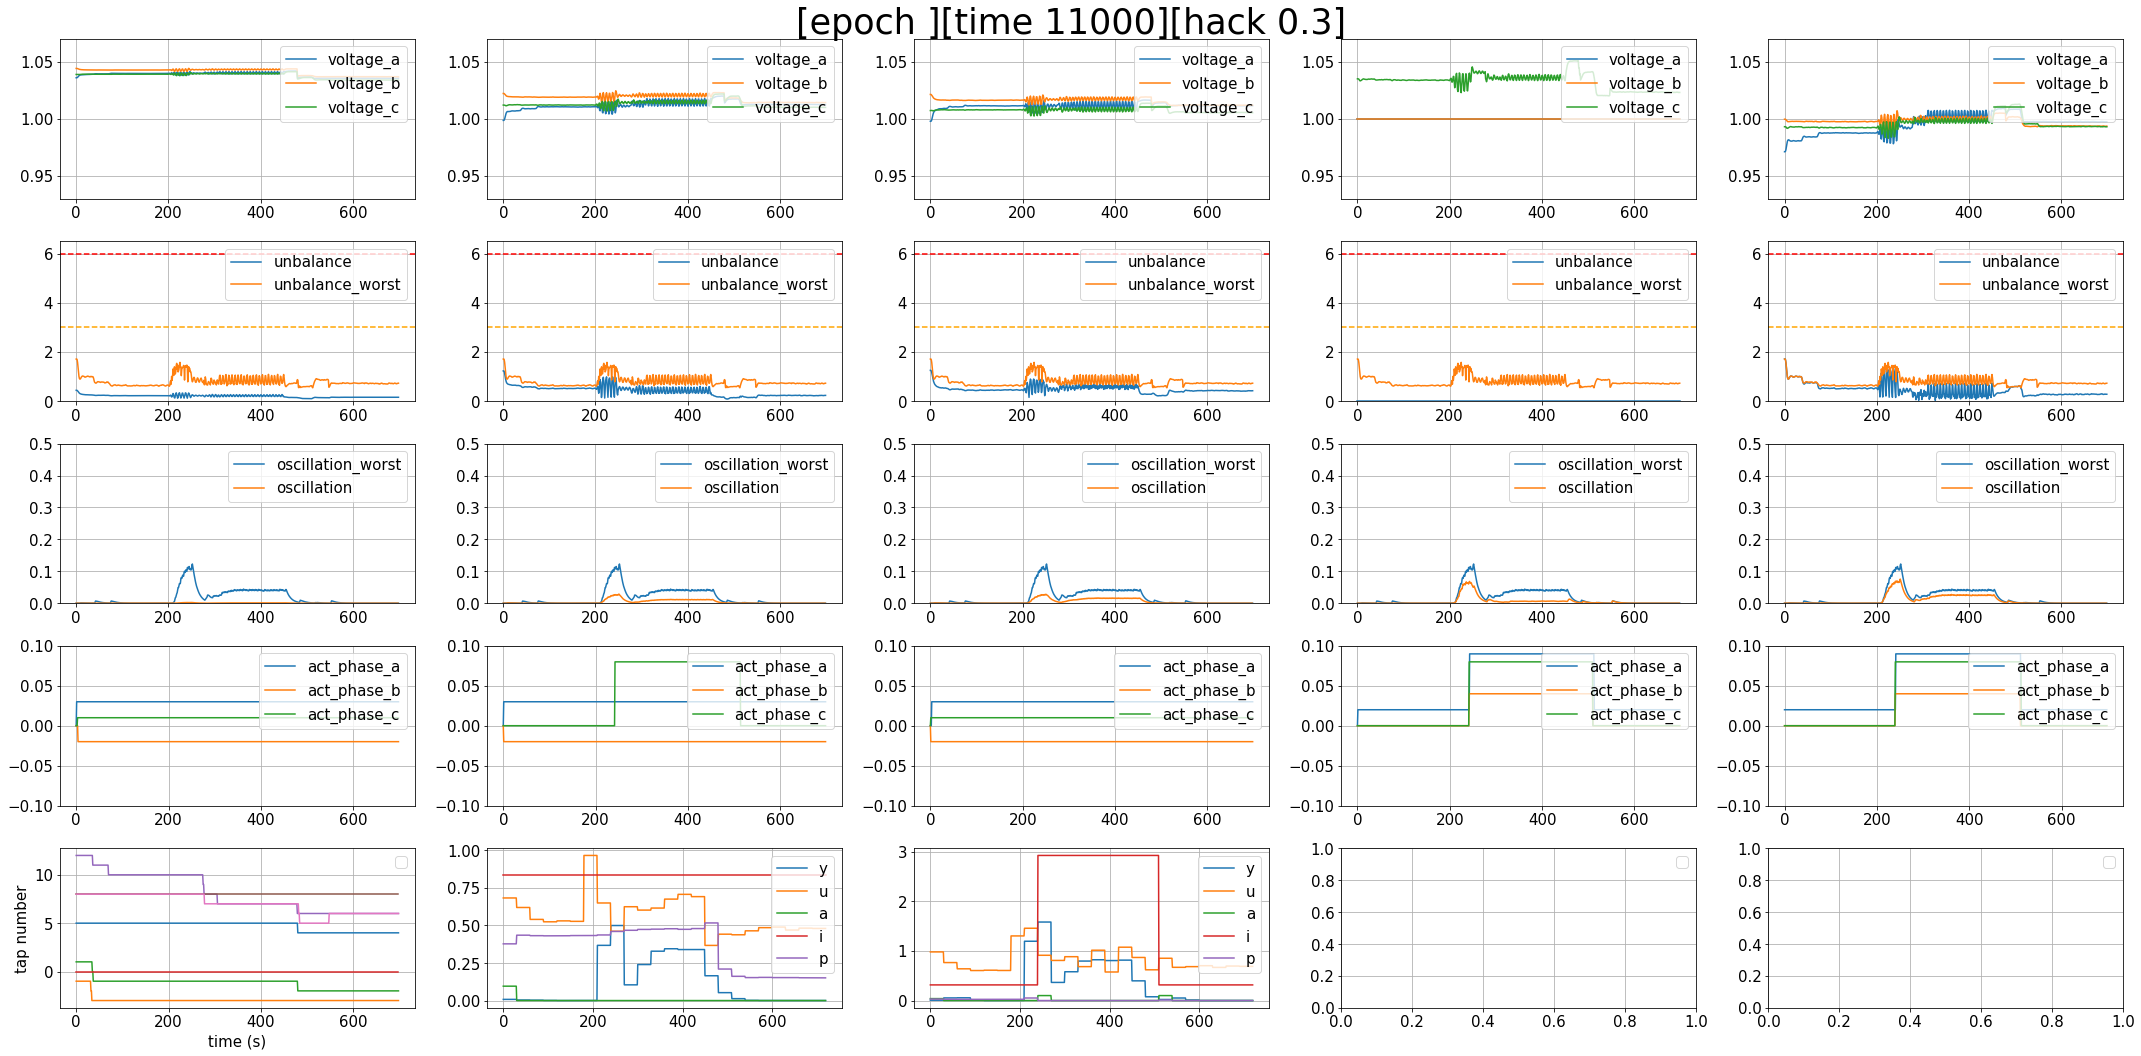

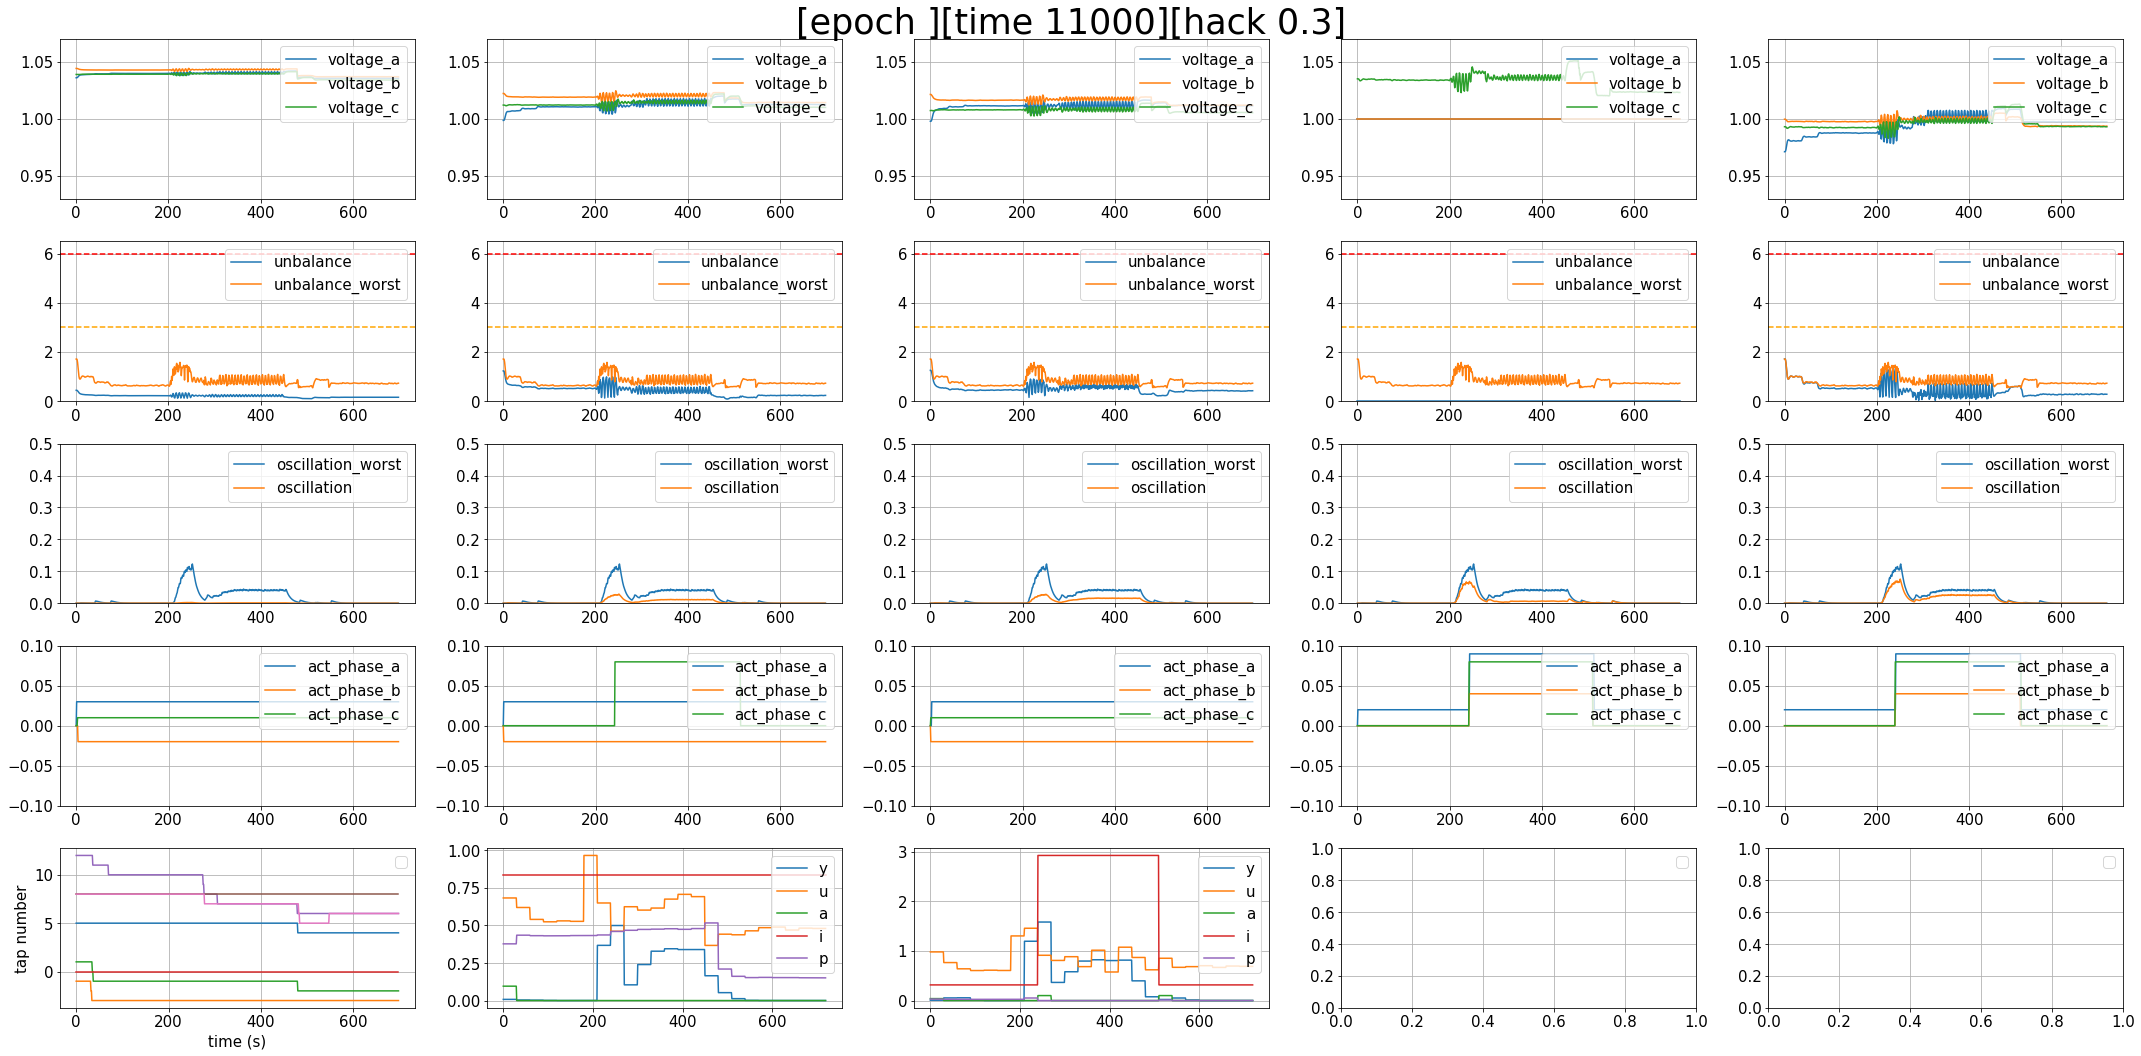

In [2]:
from pycigar.utils.logging import logger
from pycigar.utils.output import plot_cluster
import matplotlib.pyplot as plt
plt.switch_backend('Tkagg')
%matplotlib inline 
plot_cluster(logger().log_dict, logger().custom_metrics, '', 0)

In [3]:
plt.show()

In [4]:
obs['1'].shape

(69,)

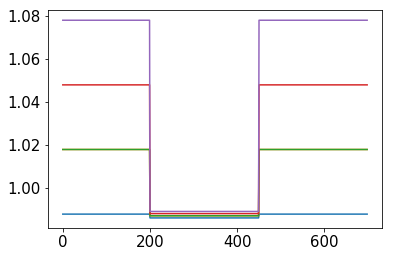

In [5]:
plt.plot(logger().log_dict['adversary_inverter_s65a']['control_setting'])

In [6]:
plt.show()

In [1]:
import matplotlib.pyplot as plt
plt.switch_backend('tkagg')
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
import matplotlib
%matplotlib inline

misc_inputs = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

# misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/misc_inputs.csv'
# dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee123busdata/ieee123.dss'
# load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/load_solar_data.csv'
# breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/breakpoints.csv'

best_dir = '/home/toanngo/result_lstm_ieee37_auto/sytoanngo/ieee37_lstm/main/run_train_2021-05-18_04-15-12/run_train_50674_00002_2_T=0,lr=0.0005_2021-05-18_04-15-12/latest/policy_499'
tf.compat.v1.enable_eager_execution()
policy = tf.saved_model.load(str(best_dir))
infer = policy.signatures['serving_default']

action_dist, _ = ModelCatalog.get_action_dist(Tuple([Discrete(21)] * 3), config={}, dist_type=None, framework='tf')

start = 100
hack = 0.3
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_auto_fixed_controller'

from pycigar.envs import MultiAttackCentralControlPhaseSpecificPVInverterEnv
env = MultiAttackCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)

ob = env.reset()
ob = ob.tolist()
done = False
# while not done:
#     data = {
#             'prev_reward': tf.constant([0.], tf.float32),
#             'observations': tf.constant([ob], tf.float32),
#             'is_training': tf.constant(False),
#             'seq_lens': tf.constant([0], tf.int32),
#             'prev_action': tf.constant([0], tf.int64),
#             'default_policy/Placeholder_1:0': tf.constant([0], tf.int64),
#             'default_policy/Placeholder:0': tf.constant([0], tf.int64)
#     }
#     out = infer(**data
#         )['action_dist_inputs'].numpy()
#     dist = action_dist(inputs=out, model=None)
#     act = np.array(dist.deterministic_sample()).flatten()
#     ob, _, done, _ = env.step(act)
#     ob = ob.tolist()
env.reset()
done = False
t = 0
while not done:
    t += 1
    if t < 9:
        act = [12, 13, 11]
    elif t < 11 or t < 14 :
        act = [12, 13, 9]
    else:
        act = [12, 13, 11]
    _, _, done, _ = env.step(act)


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


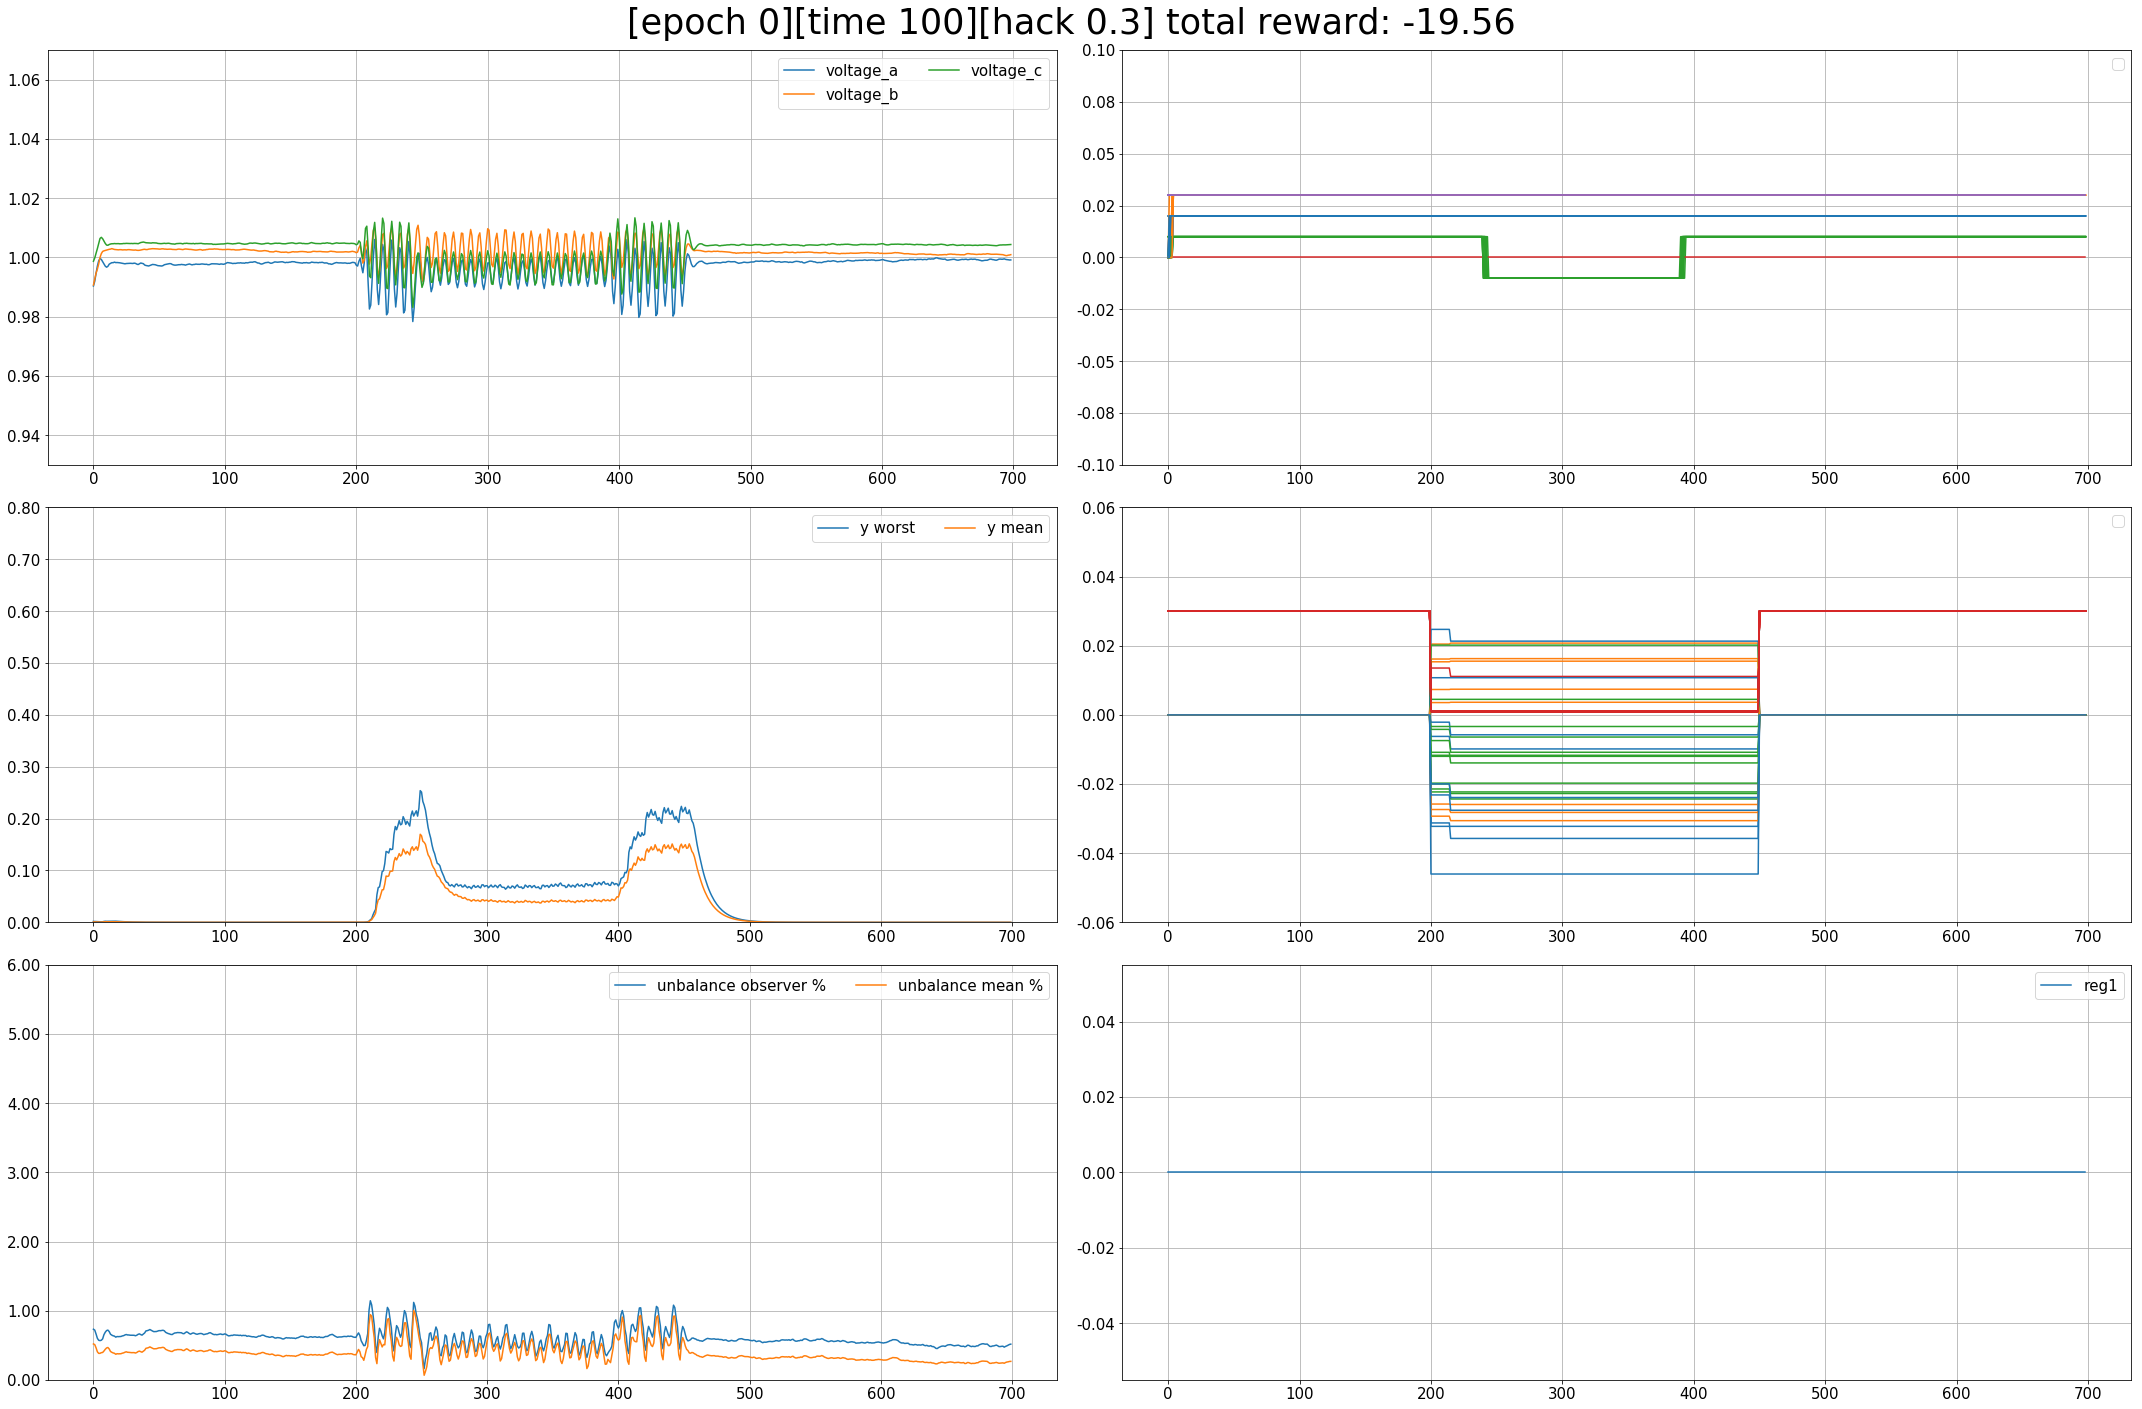

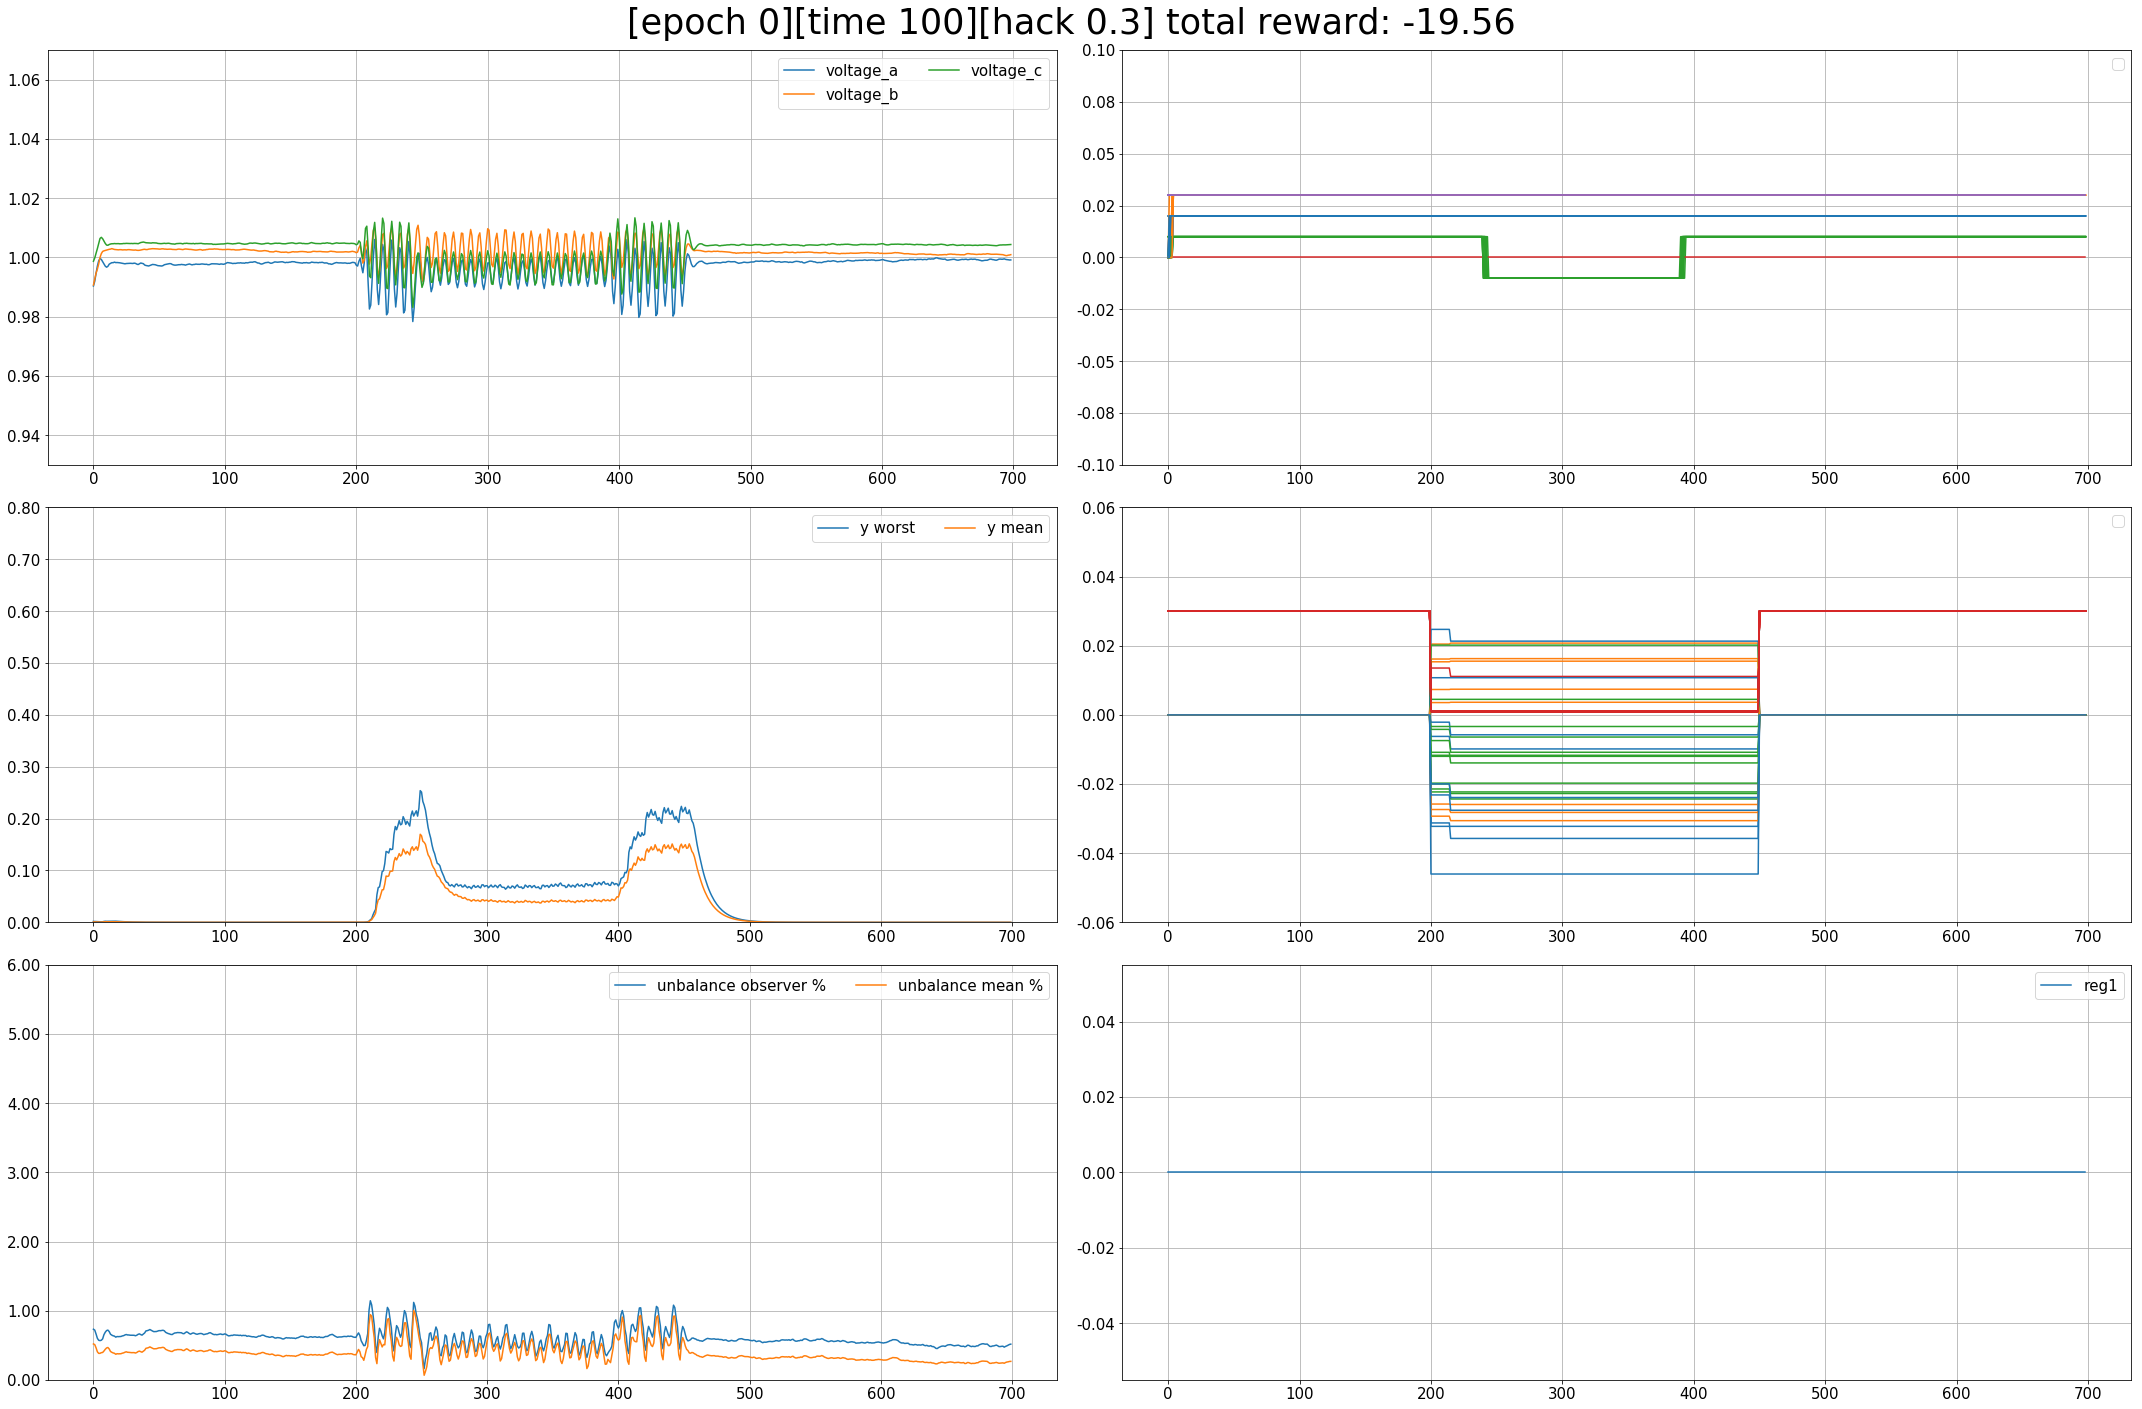

In [2]:
from pycigar.utils.logging import logger
from pycigar.utils.output import plot_new
plot_new(logger().log_dict, logger().custom_metrics, 0, False)

In [1]:
import matplotlib.pyplot as plt
plt.switch_backend('tkagg')
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
import matplotlib
from pycigar.utils.output import plot_new
from pycigar.utils.registry import make_create_env
from ray.rllib.agents.ppo import PPOTrainer
from ray.tune.registry import register_env
%matplotlib inline

misc_inputs = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

# misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/misc_inputs.csv'
# dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee123busdata/ieee123.dss'
# load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/load_solar_data.csv'
# breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/breakpoints.csv'

#best_dir = '/home/toanngo/result_lstm_ieee37_auto/sytoanngo/ieee37_lstm/main/run_train_2021-05-18_04-15-12/run_train_50674_00002_2_T=0,lr=0.0005_2021-05-18_04-15-12/latest/policy_499'
#tf.compat.v1.enable_eager_execution()
#policy = tf.saved_model.load(str(best_dir))
#infer = policy.signatures['serving_default']
#action_dist, _ = ModelCatalog.get_action_dist(Tuple([Discrete(21)] * 3), config={}, dist_type=None, framework='tf')


checkpoint = '/home/toanngo/result_lstm_ieee37_auto/sytoanngo/ieee37_lstm/main/run_train_2021-05-18_04-15-12/run_train_50674_00002_2_T=0,lr=0.0005_2021-05-18_04-15-12/checkpoint/checkpoint_499/checkpoint-499'

start = 100
hack = 0.3
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_auto_fixed_controller'

pycigar_params = {'exp_tag': 'cooperative_multiagent_ppo',
                  'env_name': 'MultiAttackCentralControlPhaseSpecificPVInverterEnv',
                  'simulator': 'opendss'}

create_env, env_name = make_create_env(pycigar_params, version=0)
register_env(env_name, create_env)


base_config = {
    "env": env_name,
    "gamma": 0.5,
    'lr': 1e-3,
    #"lr_schedule": [[0, 2e-2], [20000, 1e-4]],
    'env_config': sim_params,
    'rollout_fragment_length': 20,
    'train_batch_size': 500, #256, #250
    'clip_param': 0.1,
    'lambda': 0.95,
    'vf_clip_param': 100,

    'num_workers': 1,
    'num_cpus_per_worker': 1,
    'num_cpus_for_driver': 1,
    'num_envs_per_worker': 1,

    'log_level': 'WARNING',

    'model': {
        'fcnet_activation': 'tanh',
        'fcnet_hiddens': [32, 32], #[16, 16],
        'free_log_std': False,
        'vf_share_layers': False,
        'use_lstm': True,
        'lstm_cell_size': 16,
        'max_seq_len': 5,
    },

    # ==== EXPLORATION ====
    'explore': False,
    'exploration_config': {
        'type': 'StochasticSampling',  # default for PPO
    }}

import ray
ray.init(local_mode=True)
agent = PPOTrainer(config=base_config)
agent.restore(checkpoint)

from pycigar.envs import MultiAttackCentralControlPhaseSpecificPVInverterEnv
env = MultiAttackCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)

ob = env.reset()
ob = ob.tolist()
act = [10, 10, 10]
state = agent.get_policy().get_initial_state()
done = False

while not done:
    act, state, _ = agent.compute_action(ob, state=state, prev_action=act, prev_reward=0)
    ob, _, done, _ = env.step(act)
    ob = ob.tolist()

Instructions for updating:
non-resource variables are not supported in the long term


2021-05-21 02:25:49,304	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265
2021-05-21 02:25:52,616	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-05-21 02:25:53,238	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_in (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [(None, 1)]          0           seq_in[0][0]                     
___________

/home/toanngo/anaconda3/envs/pycigar/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2021-05-21 02:25:59,326	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_in (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [(None, 1)]          0           seq_in[0][0]                     
____________________________________________________________________________________________

/home/toanngo/anaconda3/envs/pycigar/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/toanngo/anaconda3/envs/pycigar/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/toanngo/anaconda3/envs/pycigar/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2021-05-21 02:26:28,242	INFO trainable.py:103 -- Trainable.setup took 35.634 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-05-21 02:26:29,574	INFO trainable.py:372 -- Restored on 192.168.1.47 from checkpoint: /home/toanngo/result_lstm_ieee37_auto/sytoanngo/ieee37

In [1]:
import matplotlib.pyplot as plt
plt.switch_backend('tkagg')
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box
import matplotlib
%matplotlib inline

misc_inputs = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

# misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/misc_inputs.csv'
# dss = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee123busdata/ieee123.dss'
# load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/load_solar_data.csv'
# breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/breakpoints.csv'

start = 100
hack = 0.3
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_auto_fixed_controller'

sim_params['M'] = 300
sim_params['N'] = 0.5
sim_params['P'] = 1
sim_params['Q'] = 1
sim_params['T'] = 300
from pycigar.envs import MultiAttackCentralControlPhaseSpecificPVInverterEnv
env = MultiAttackCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)

env.reset()
done = False
t = 0
while not done:
    act = [10, 10, 10]
    _, _, done, _ = env.step(act)

Instructions for updating:
non-resource variables are not supported in the long term


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


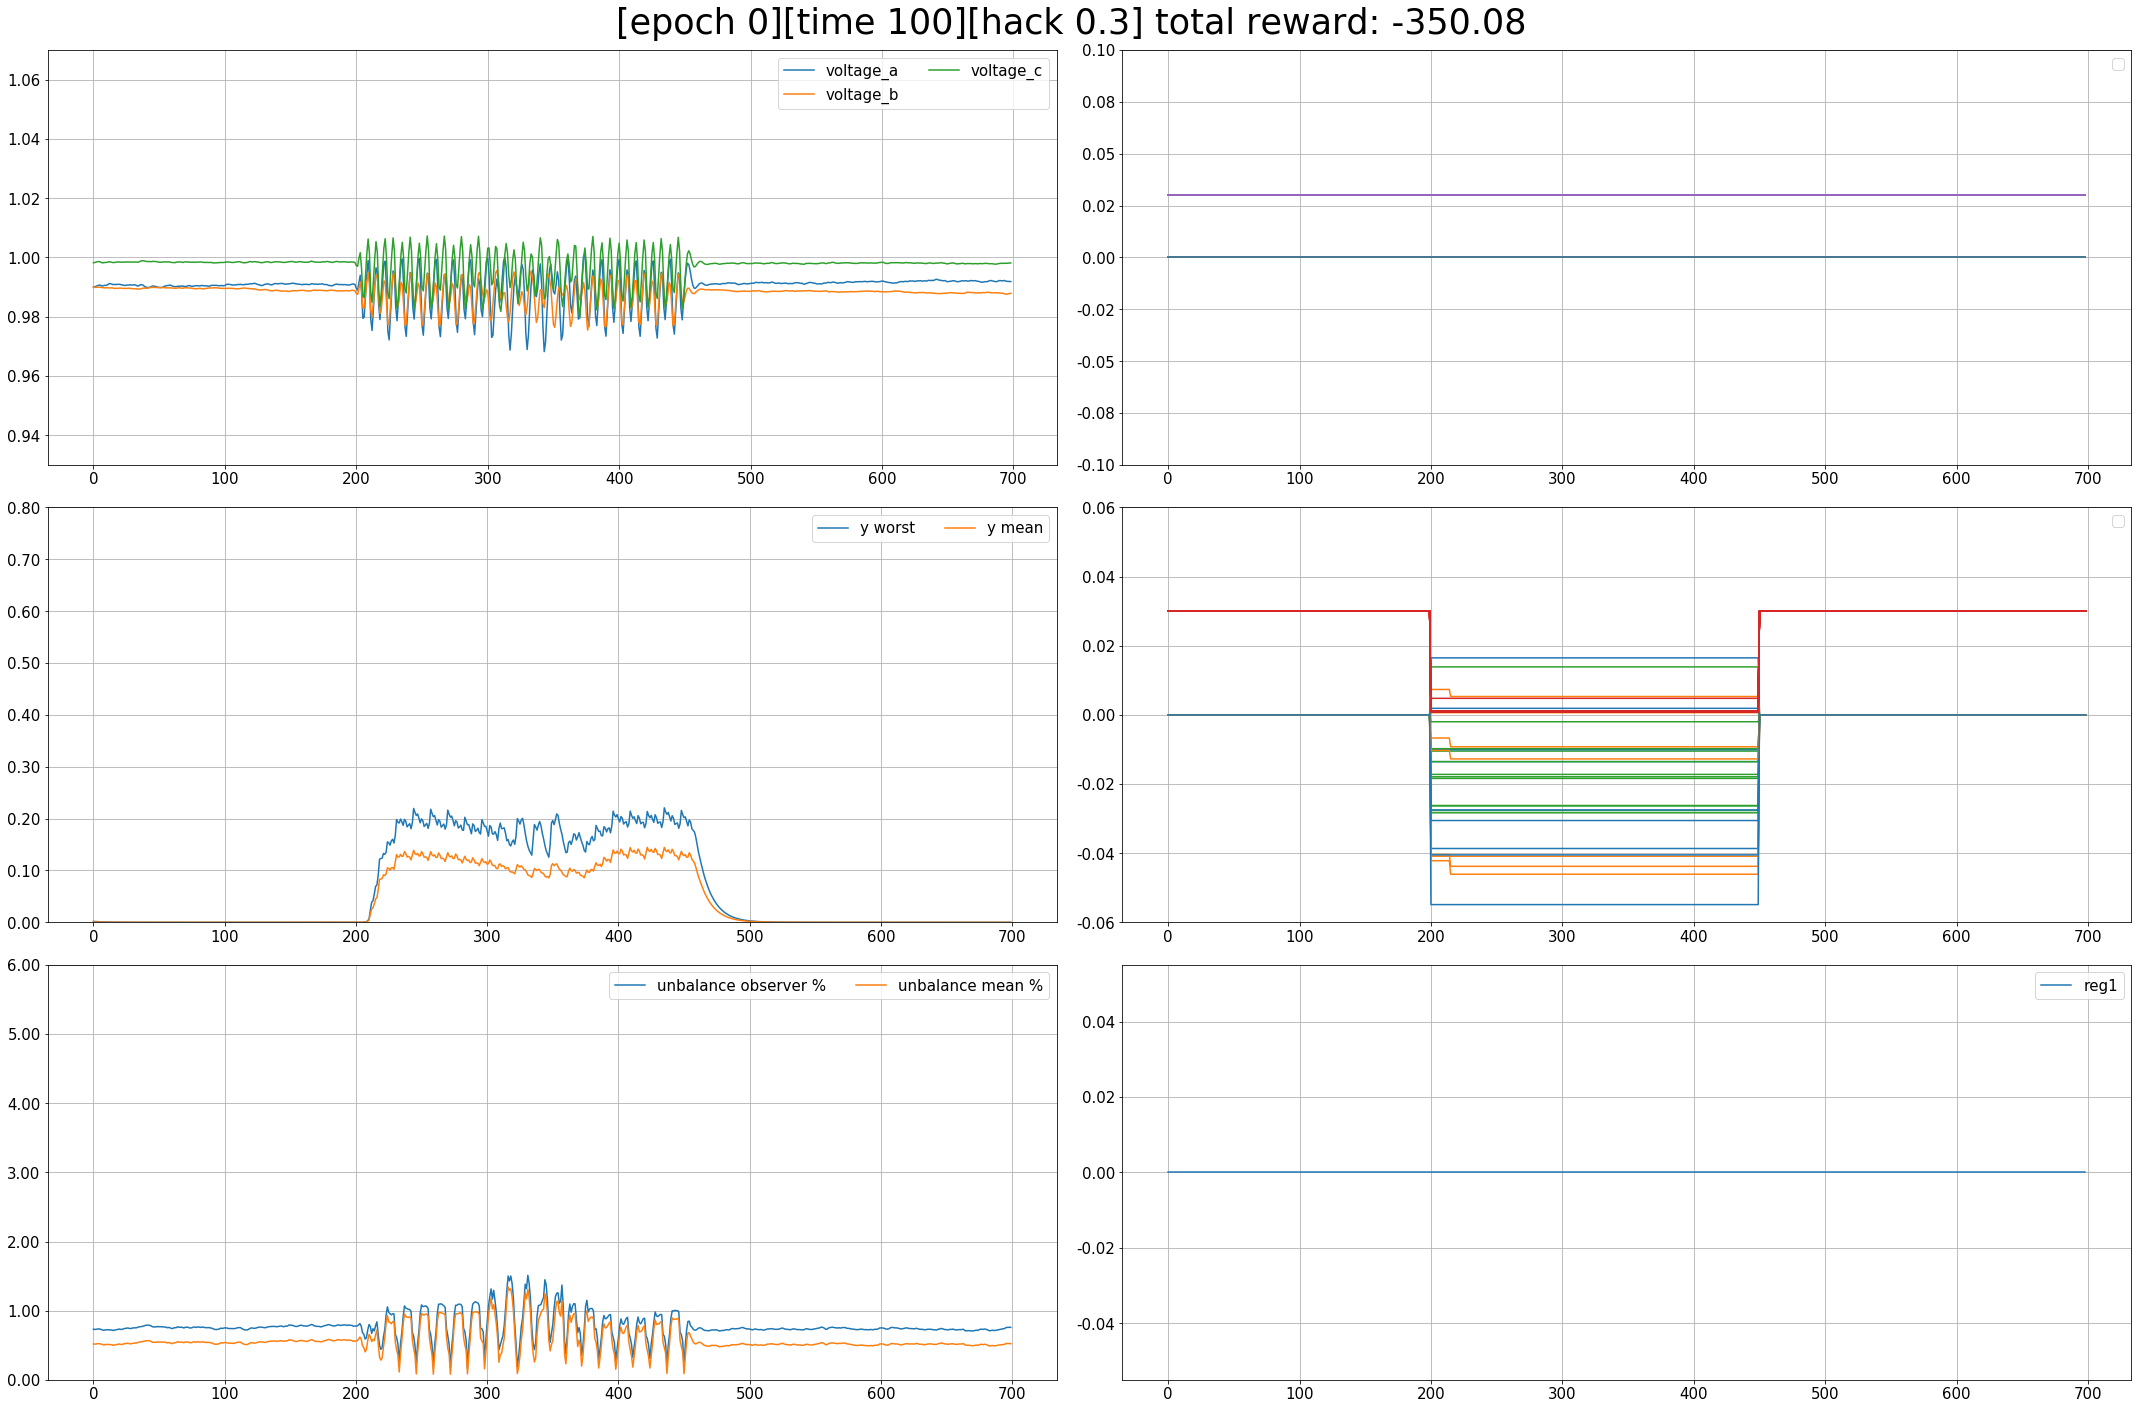

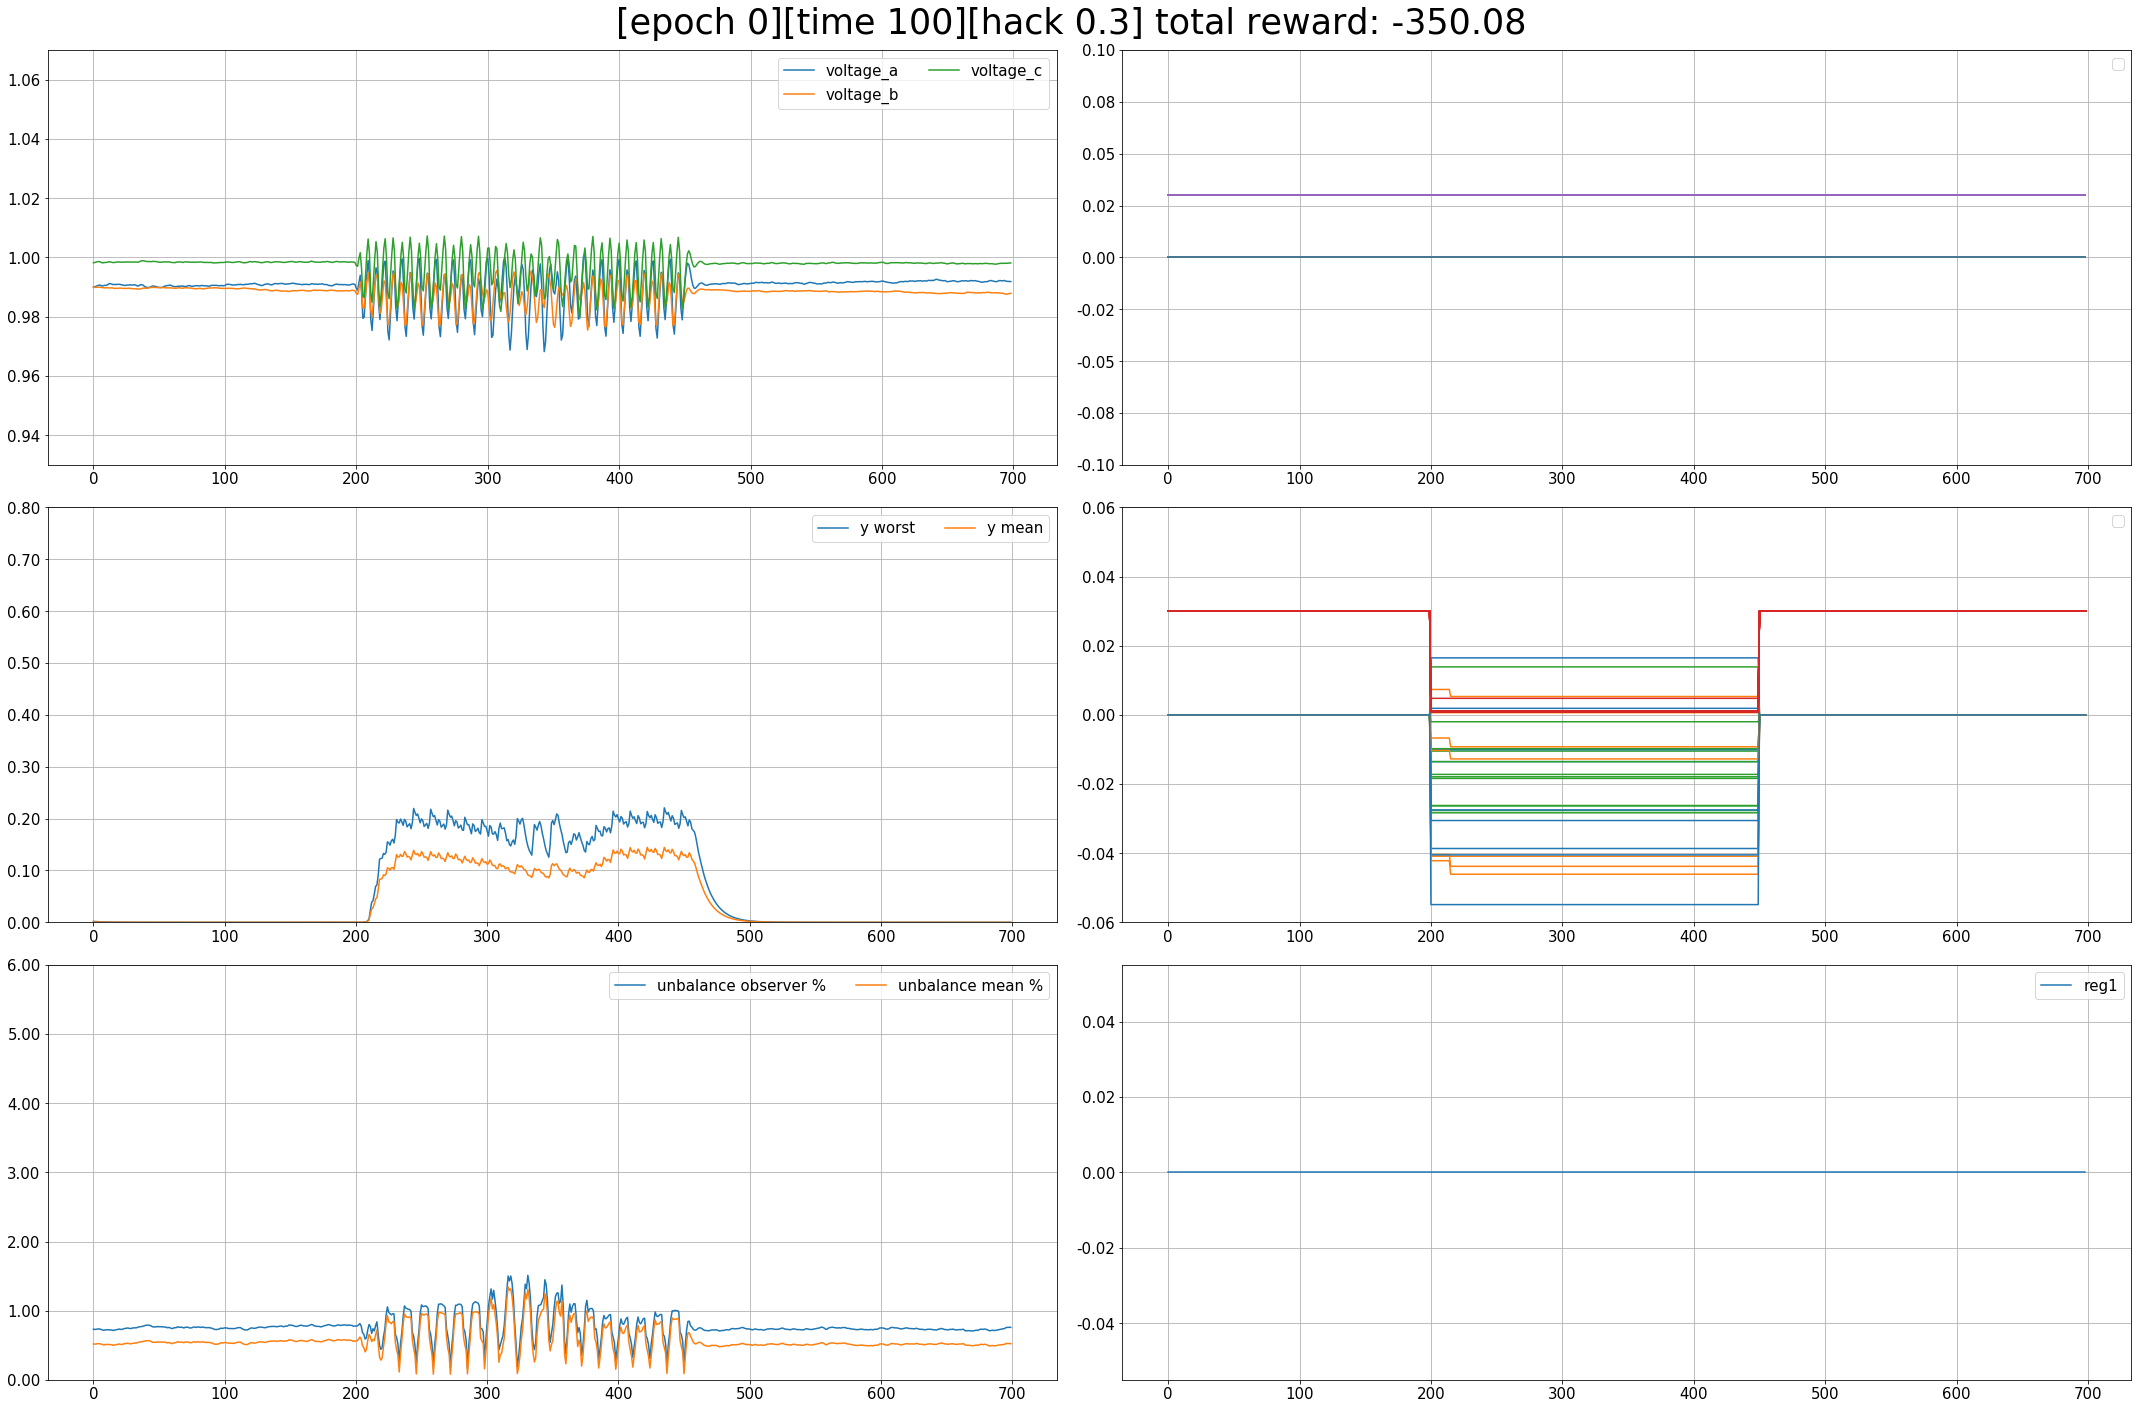

In [2]:
from pycigar.utils.logging import logger
from pycigar.utils.output import plot_new
plot_new(logger().log_dict, logger().custom_metrics, 0, False)